# Clustering Assignment

By: Simranjeet Singh

E-mail: sjsingh1809@gmail.com

## 1. Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

import time, warnings
import datetime as dt
warnings.filterwarnings("ignore")

import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

## 2. Importing the data set

In [2]:

country_df = pd.read_csv("Country-data.csv")
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

## 3. Performing the basic checks on the data set

In [3]:
country_df.shape

(167, 10)

In [4]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
country_df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- No null or empty value is present in the data set

## 4. Performing EDA on the data set

In [7]:
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [8]:
# exports, imports and health column values are given in percentage of the GDP per captia. 
#So we are converting those columns values form % to absolute values.
country_df['exports']=country_df['exports']*country_df['gdpp']/100
country_df['imports']=country_df['imports']*country_df['gdpp']/100
country_df['health']=country_df['health']*country_df['gdpp']/100
country_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

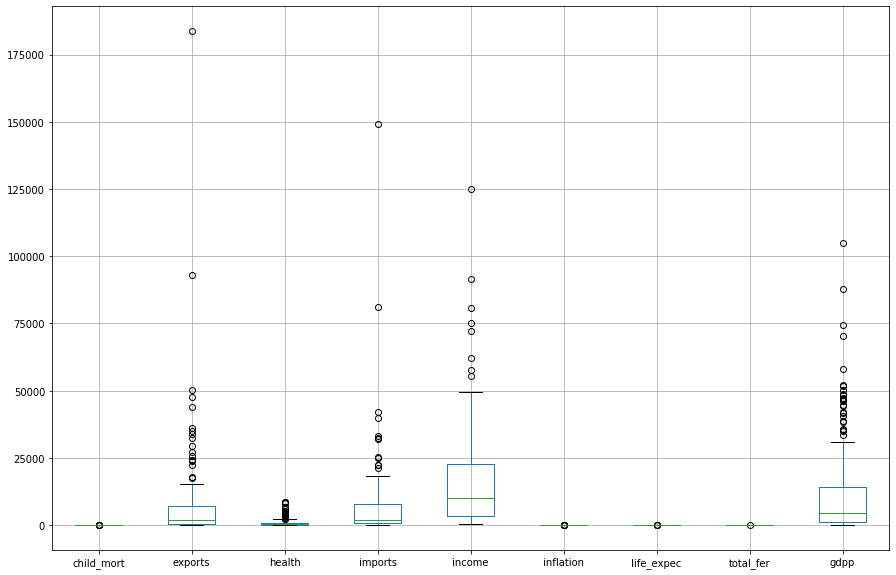

In [9]:
# creating the boxplot
plt.figure(figsize=(15,10))
country_df.boxplot()
plt.show()

Observation:
    - We are able to see outliers for columns
        - exports
        - health
        - imports
        - income
        - gdpp

Now the next step is to check columns with outliers. So, will check couple of those.

In [10]:
# Checking the outliers data for imports
IQR = country_df.imports.quantile(0.75) - country_df.imports.quantile(0.25)
country_df[['country','imports']][country_df.imports>country_df.imports.quantile(0.75)+1.5*IQR]

country   imports
8                 Austria   22418.2
15                Belgium   33166.8
44                Denmark   25288.0
73                Ireland   42125.5
91             Luxembourg  149100.0
98                  Malta   32494.0
110           Netherlands   31990.8
114                Norway   25023.0
133             Singapore   81084.0
144                Sweden   21204.7
145           Switzerland   39761.8
157  United Arab Emirates   22260.0

In [11]:
# Checking the outliers data for exports
IQR = country_df.exports.quantile(0.75) - country_df.exports.quantile(0.25)
country_df[['country','exports']][country_df.exports>country_df.exports.quantile(0.75)+1.5*IQR]

country   exports
8                 Austria   24059.7
15                Belgium   33921.6
23                 Brunei   23792.2
44                Denmark   29290.0
53                Finland   17879.4
58                Germany   17681.4
68                Iceland   22374.6
73                Ireland   50161.0
82                 Kuwait   25679.5
91             Luxembourg  183750.0
98                  Malta   32283.0
110           Netherlands   36216.0
114                Norway   34856.6
123                 Qatar   43796.9
133             Singapore   93200.0
144                Sweden   24070.2
145           Switzerland   47744.0
157  United Arab Emirates   27195.0

In [12]:
# Checking the outliers data for gdpp
IQR = country_df.gdpp.quantile(0.75) - country_df.gdpp.quantile(0.25)
country_df[['country','gdpp']][country_df.gdpp>country_df.gdpp.quantile(0.75) + 1.5*IQR]

country    gdpp
7               Australia   51900
8                 Austria   46900
15                Belgium   44400
23                 Brunei   35300
29                 Canada   47400
44                Denmark   58000
53                Finland   46200
54                 France   40600
58                Germany   41800
68                Iceland   41900
73                Ireland   48700
75                  Italy   35800
77                  Japan   44500
82                 Kuwait   38500
91             Luxembourg  105000
110           Netherlands   50300
111           New Zealand   33700
114                Norway   87800
123                 Qatar   70300
133             Singapore   46600
144                Sweden   52100
145           Switzerland   74600
157  United Arab Emirates   35000
158        United Kingdom   38900
159         United States   48400

Observation:
    - We can see that the data is pretty resonable.
    - And as per current affair the gdpp, imports and exports data is quite similar to that country actually claim in real world.
    - So will not remove the outliers

In [13]:
# Checking the correlation amoung all the columns
country_df.corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.297230 -0.430438 -0.319138 -0.524315   0.288276   
exports      -0.297230  1.000000  0.612919  0.987686  0.725351  -0.141553   
health       -0.430438  0.612919  1.000000  0.638581  0.690857  -0.253956   
imports      -0.319138  0.987686  0.638581  1.000000  0.672056  -0.179458   
income       -0.524315  0.725351  0.690857  0.672056  1.000000  -0.147756   
inflation     0.288276 -0.141553 -0.253956 -0.179458 -0.147756   1.000000   
life_expec   -0.886676  0.377694  0.545626  0.397515  0.611962  -0.239705   
total_fer     0.848478 -0.291096 -0.407984 -0.317061 -0.501840   0.316921   
gdpp         -0.483032  0.768894  0.916593  0.755114  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.377694  -0.291096  0.768894  
health        0.545626  -0.407984  0.916593  
imports       0.397515  -0.317061  0.755114  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

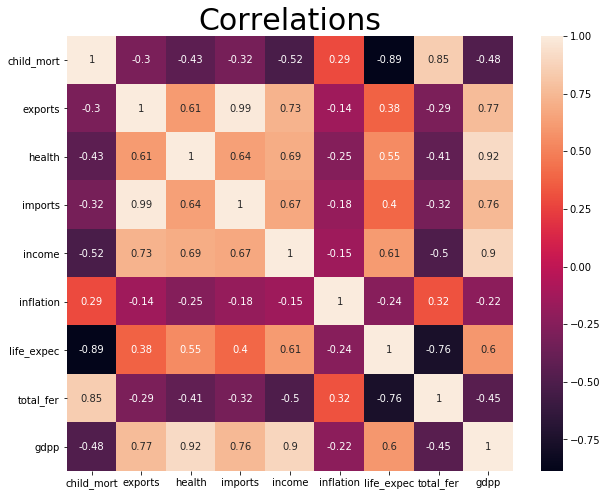

In [14]:
# plotting the heatmap to check the correlations
plt.figure(figsize=(10,8))
plt.title("Correlations",fontsize=30)
sns.heatmap(country_df.corr(),annot=True)

Observations(this is very highly correlated data set):
    - There is very hight negative correlation between child_mort and life_expec
    - There is very hight negative correlation between life_expen and total_fer
    - There is very high positive correlation between imports and exports
    - There is very high positive correlation between health and gdpp
    - There is very high positive correlation between income and exports
    - There is very high positive correlation between total_fer and child_mort
    
But the data seems to be fair so for now we are not removing any data.

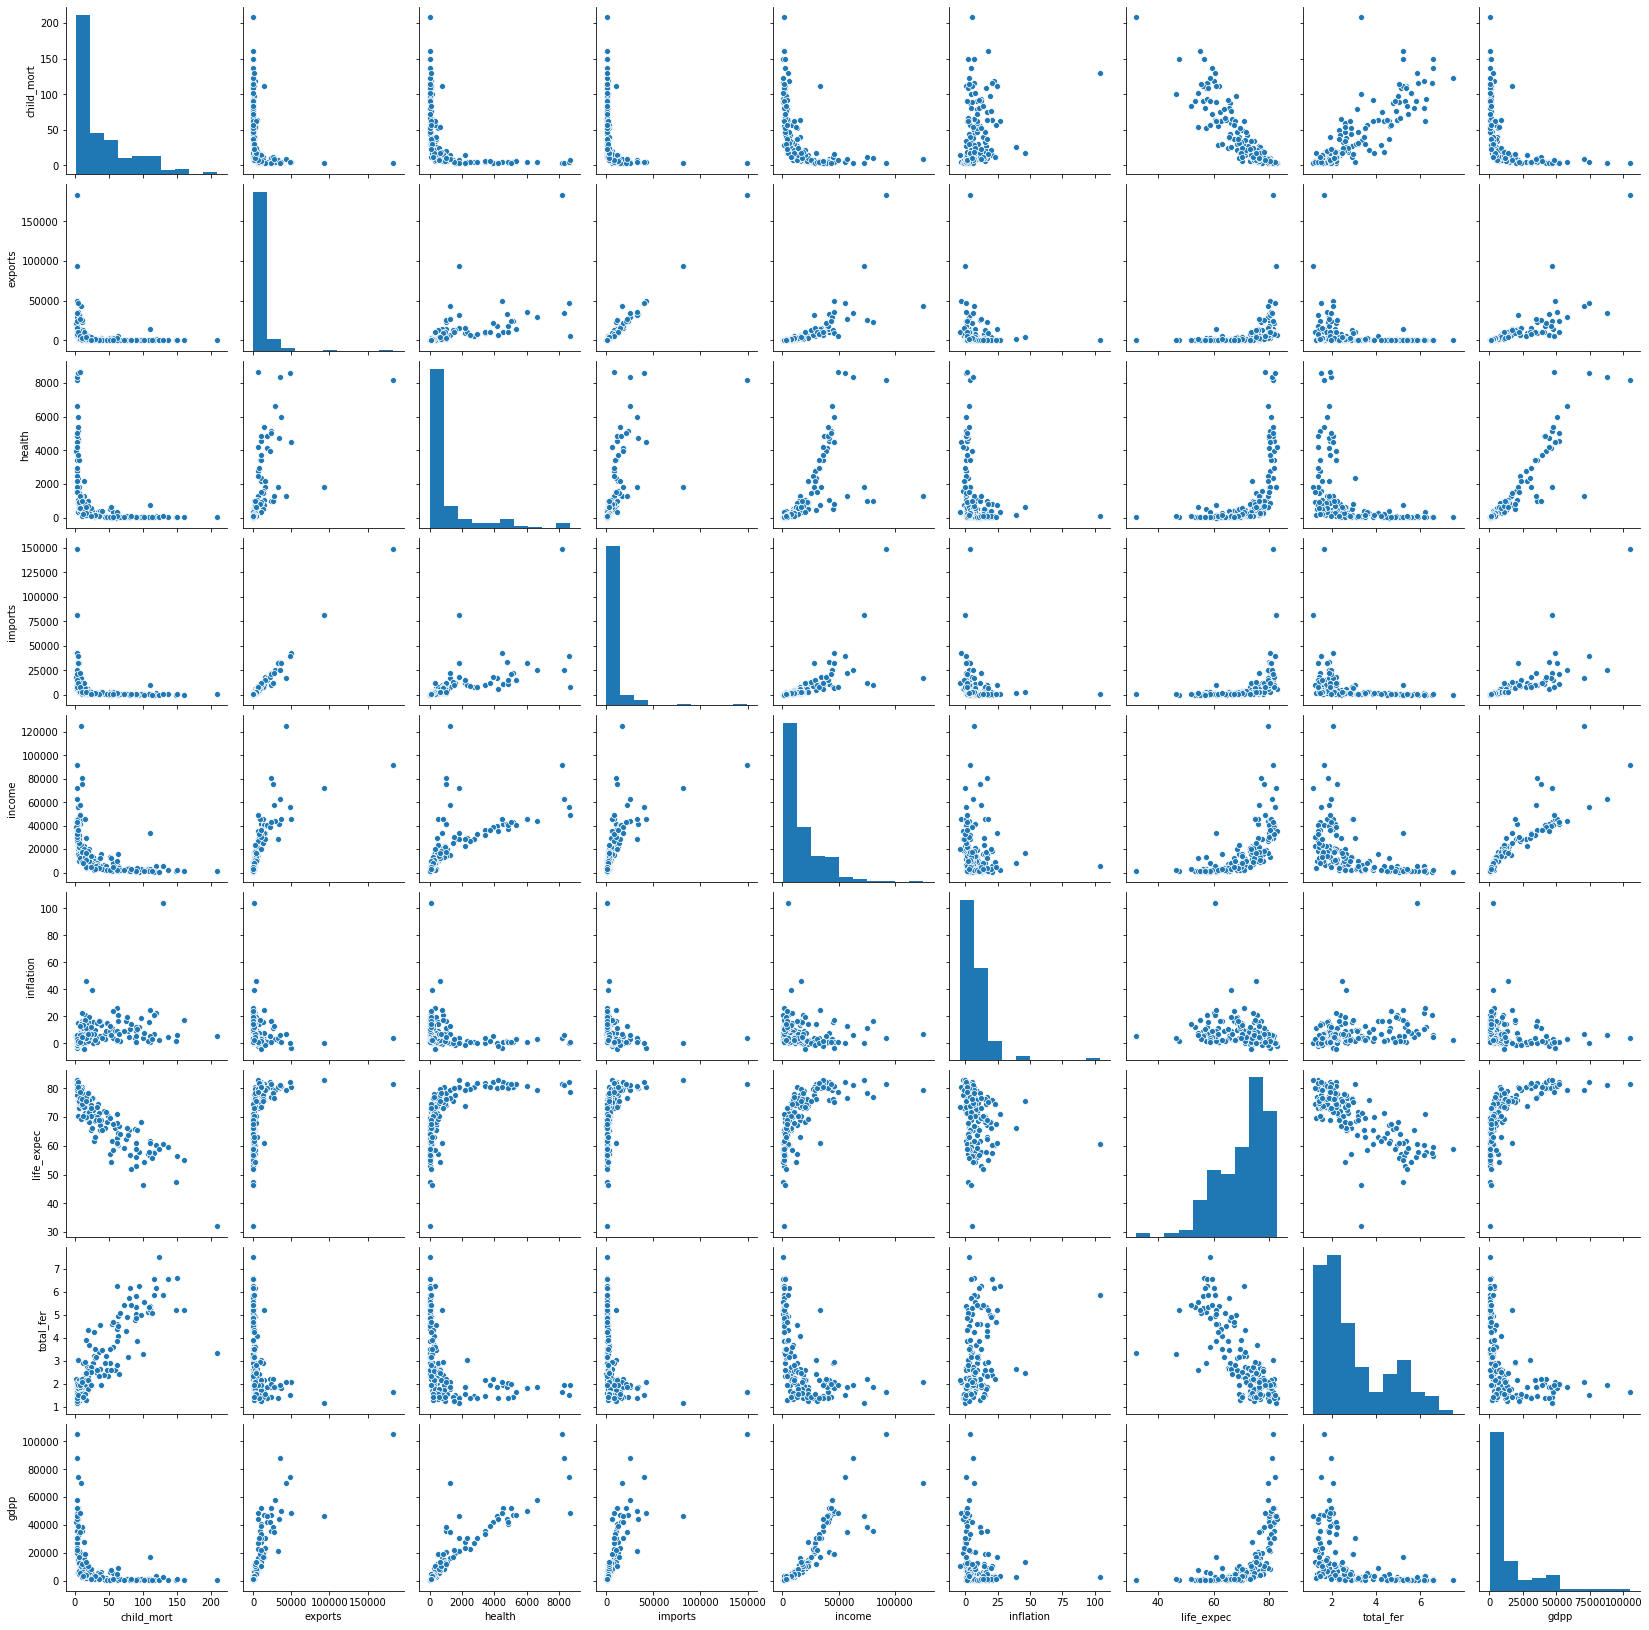

In [15]:
# Now lets look at the pair plot to get the clear picture
sns.pairplot(country_df)

Observation:
    - We can see through pair plot that the data is not normally distributed.
    - And the data is either left skewed or right skewed.
    - So will apply power transformation on the data set.

In [16]:
country_model=country_df.drop("country",axis=1)

## 5. Power Transformation

In [17]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
powerTrans_df = pd.DataFrame(pt.fit_transform(country_model))
powerTrans_df.columns= country_model.columns

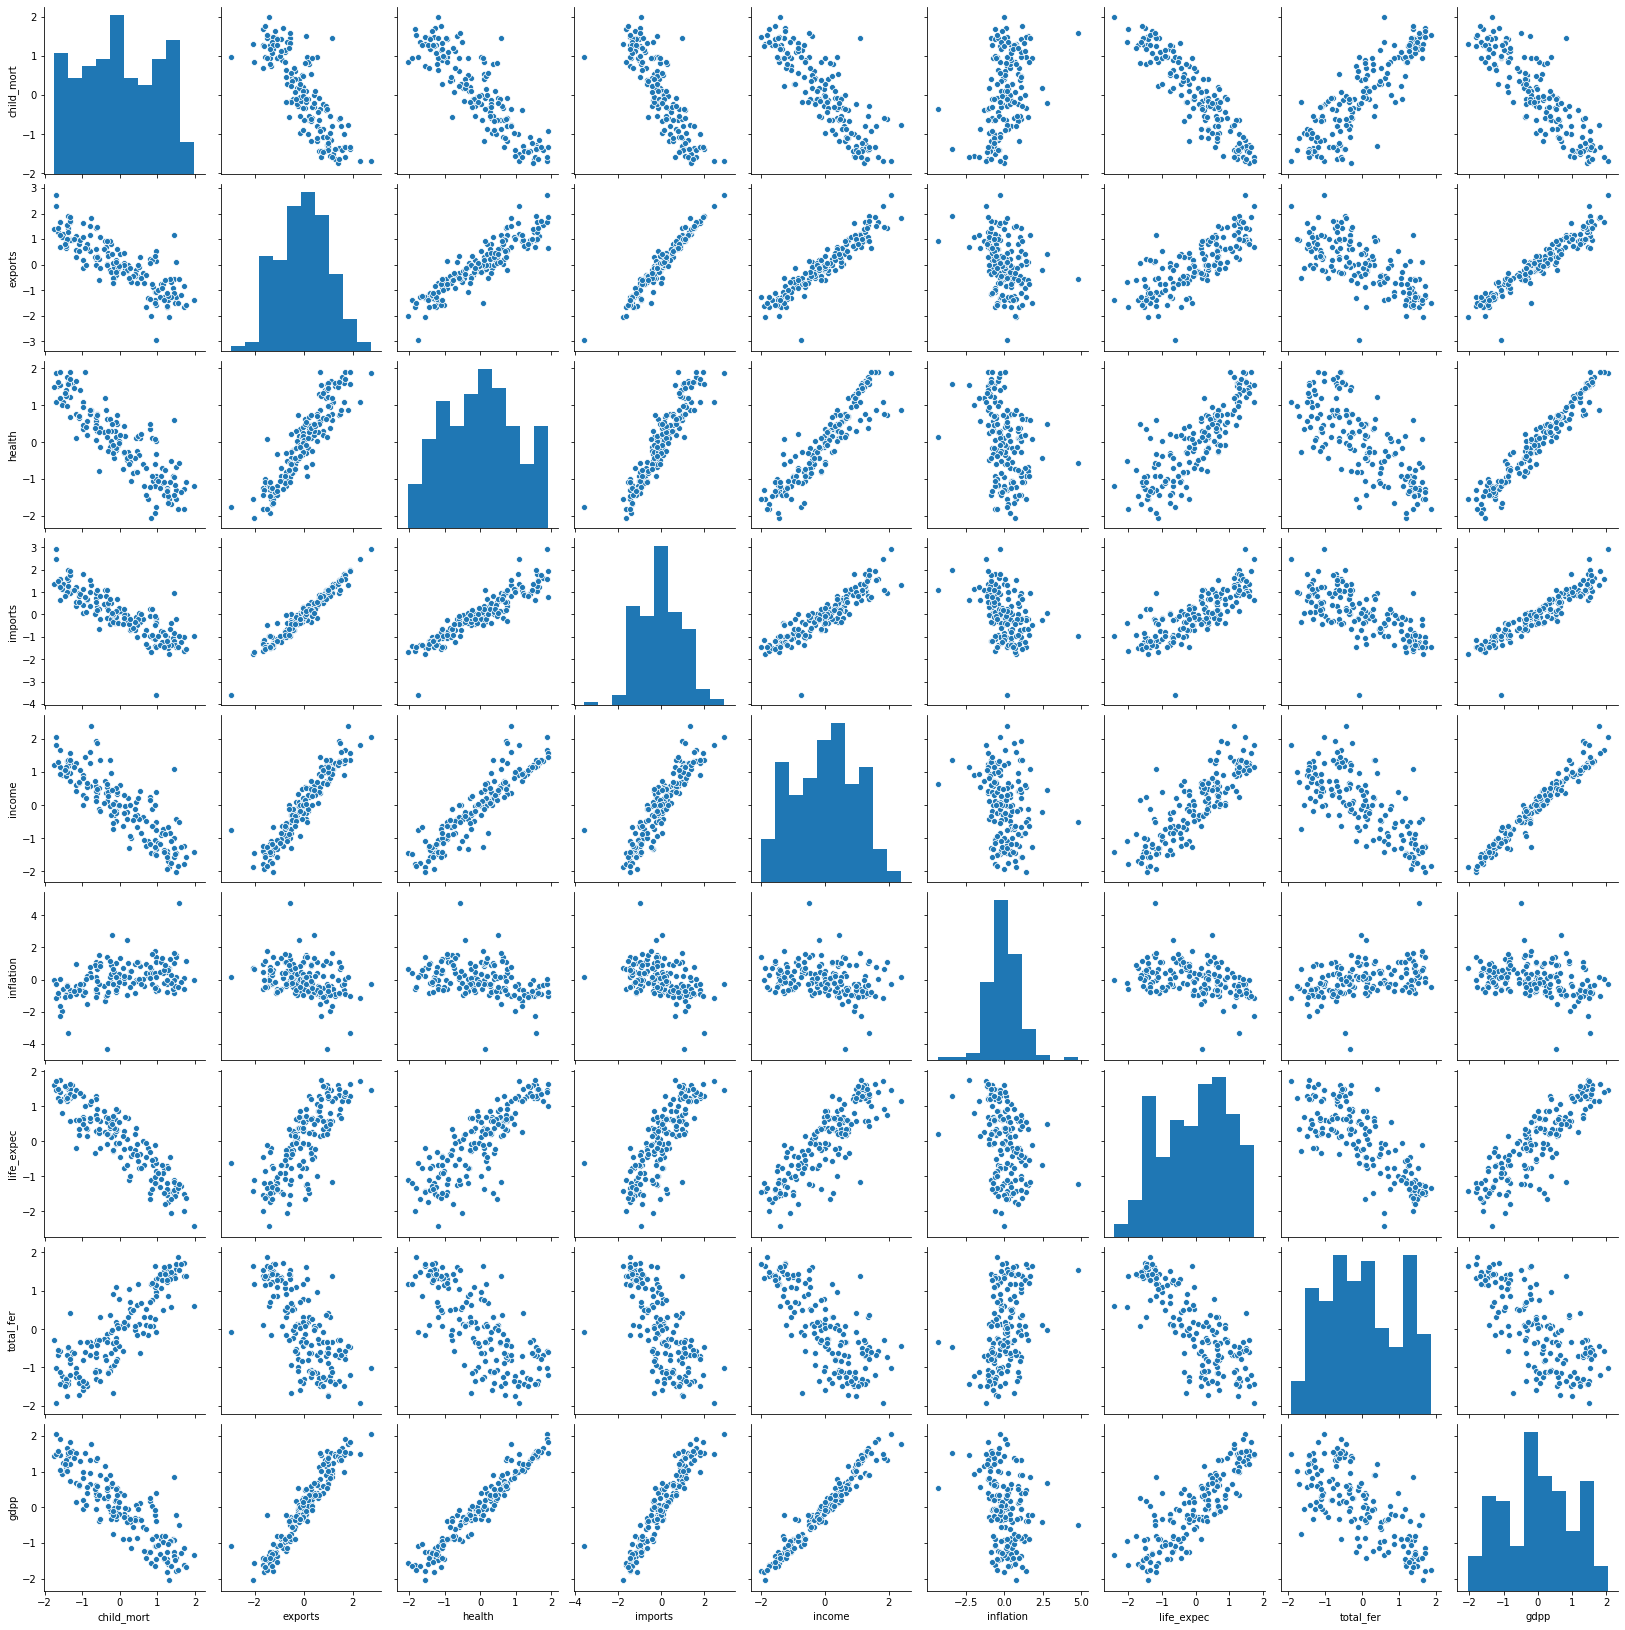

In [18]:
# now will check the pair plot again
sns.pairplot(powerTrans_df)
plt.show()

Observation:
    - The data is more clear now.
    - So lets check the correlations again

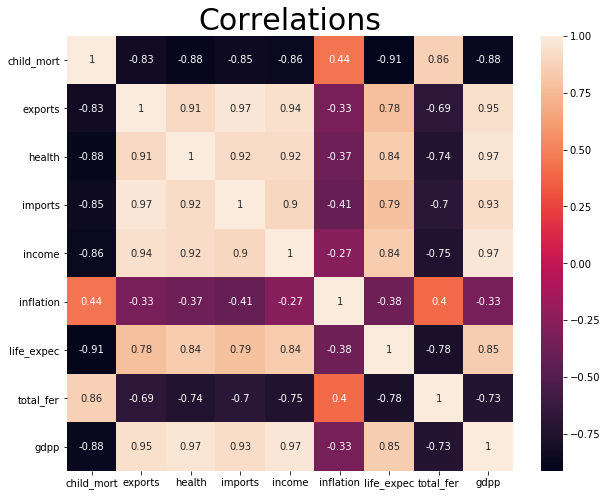

In [19]:
# Checking the correlation again.
plt.figure(figsize=(10,8))
plt.title("Correlations",fontsize=30)
sns.heatmap(powerTrans_df.corr(),annot=True)
plt.show()

Now lets make the boxplots again on the transformed data

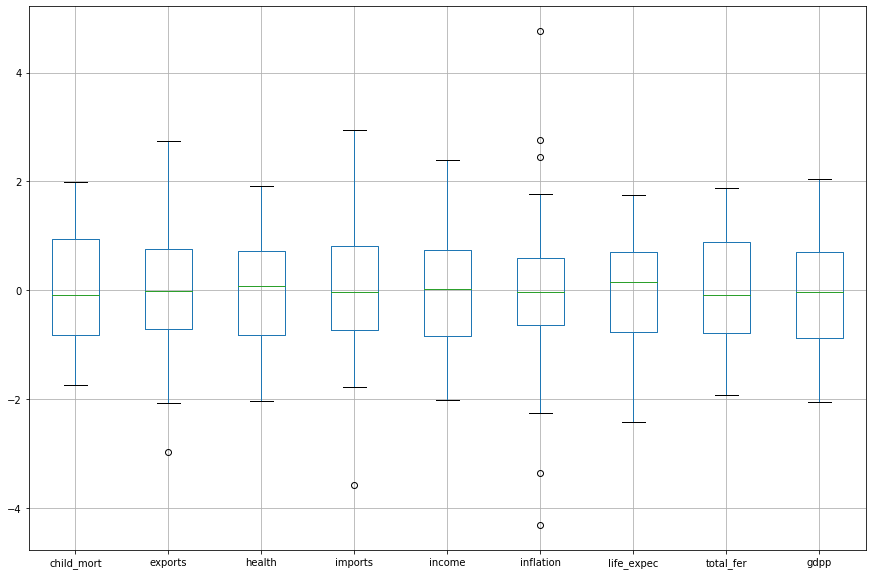

In [20]:
# boxplot on the transformed data
plt.figure(figsize=(15,10))
powerTrans_df.boxplot()
plt.show()

Observation:
    - So the outliers are significantly less now.

#### So let's move ahead and proceed towards clustering techniques

## 6. K-means clustering 

The first step is to find the value of 'k' in K-means.

So, to find optimial value of 'k' we will use the Elbow method.

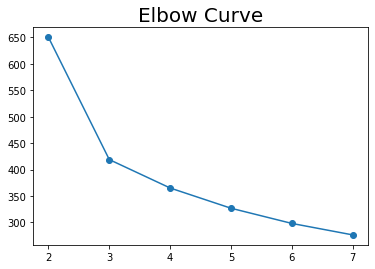

In [21]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(powerTrans_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.title('Elbow Curve', fontsize=20)
plt.plot(range_n_clusters,ssd,"-o")
plt.show()

Observation:
    - We see a significant decrease at k=2 and k=3.
    - So, will use k=2/k=3 and move ahead.

In [22]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(powerTrans_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(powerTrans_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.44420866548727345
For n_clusters=3, the silhouette score is 0.3970904804043125
For n_clusters=4, the silhouette score is 0.31278212110754555
For n_clusters=5, the silhouette score is 0.26672366101826084
For n_clusters=6, the silhouette score is 0.2836364402596401
For n_clusters=7, the silhouette score is 0.27161832897703375


Note: So from Elbow and silhouette both we observed that we can use k=2 and k=3 for K-means.

#### Firstly we will keep k=2

In [23]:
kmeans = KMeans(n_clusters=2,random_state=15,n_init=50,init='k-means++')
kmeans.fit(powerTrans_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=15, tol=0.0001, verbose=0)

In [24]:
kmeans.labels_

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int32)

In [25]:
# assign the label to the data
finalData_df_2 = pd.concat([country_df[['country']],powerTrans_df],axis=1)
finalData_df_2['cluster_id'] =kmeans.labels_
finalData_df_2.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   
1              Albania   -0.220994 -0.238427 -0.042924 -0.055108  0.012538   
2              Algeria    0.217834 -0.030785 -0.270052 -0.266188  0.232275   
3               Angola    1.506186  0.100544 -0.661987 -0.219429 -0.408251   
4  Antigua and Barbuda   -0.637380  0.602677  0.563269  0.758134  0.572583   

   inflation  life_expec  total_fer      gdpp  cluster_id  
0   0.459416   -1.526455   1.544053 -1.462273           0  
1  -0.154659    0.621738  -0.992833 -0.121133           1  
2   1.059790    0.652698   0.313175 -0.063195           0  
3   1.512843   -1.239045   1.623128 -0.219666           0  
4  -0.723442    0.699553  -0.368063  0.609228           1

In [26]:
finalData_df_2.cluster_id.value_counts()

1    88
0    79
Name: cluster_id, dtype: int64

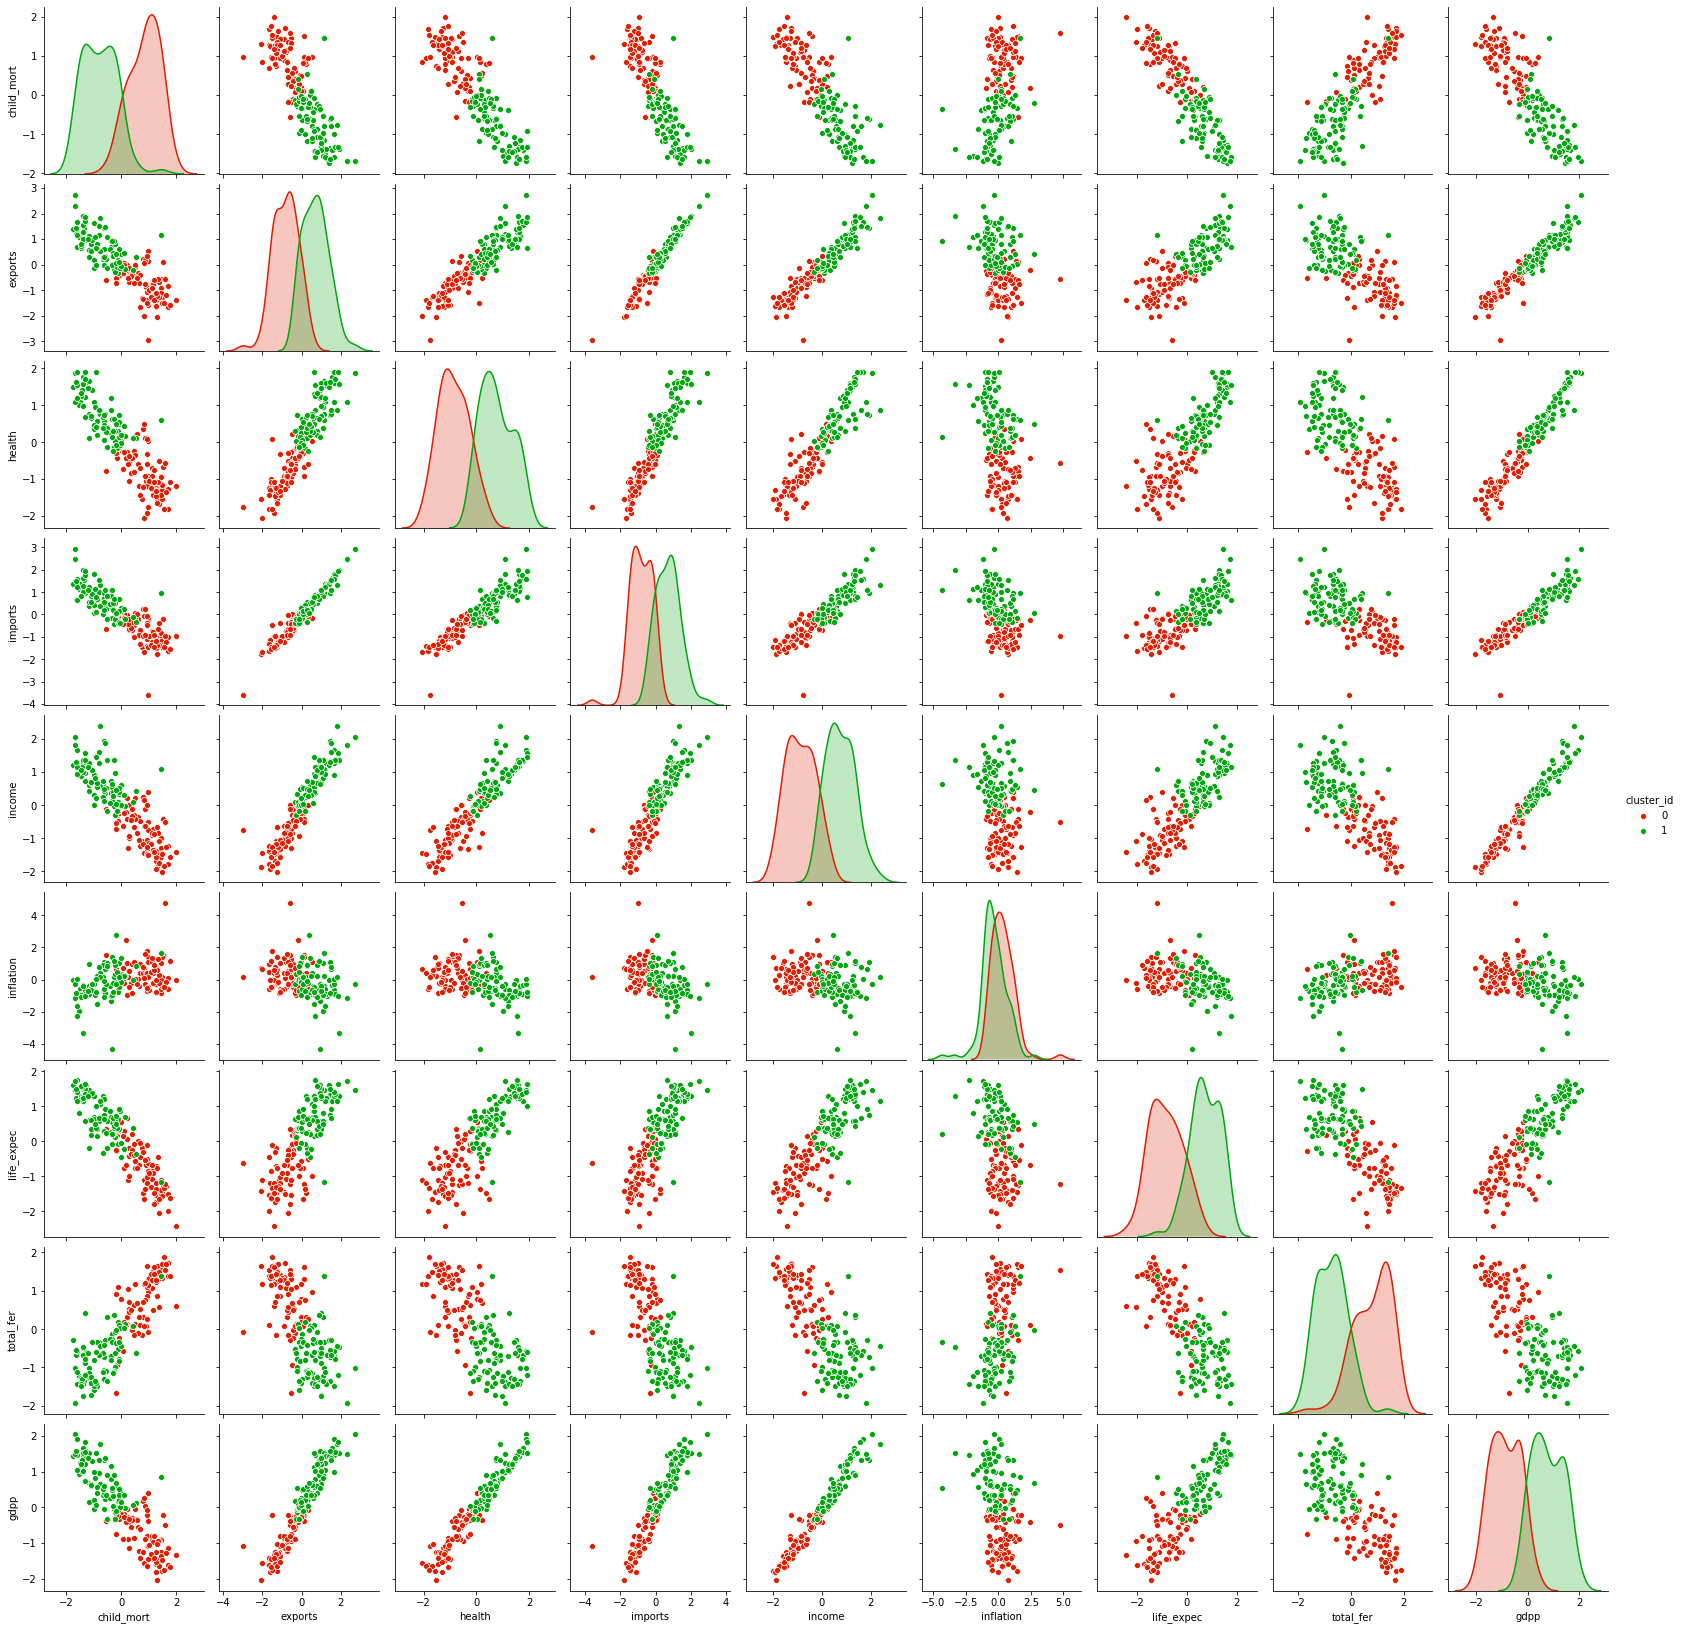

In [27]:
# plotting the pair plot based on 2- clusters
sns.pairplot(finalData_df_2,diag_kind='kde',hue='cluster_id',palette=sns.color_palette(['#DE1E00','#00A50E','#2A65FB']))
plt.show()

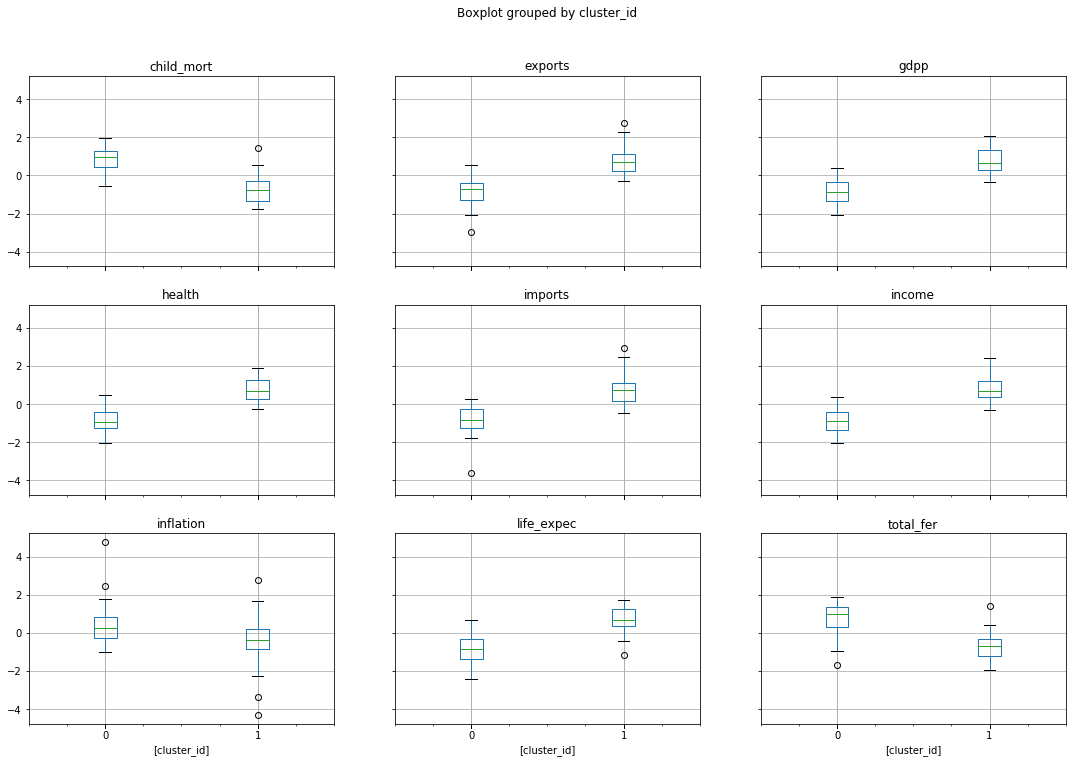

In [28]:
# creating the boxplot based on the 2 clusters
finalData_df_2.boxplot(by = 'cluster_id',layout=(3,3), figsize=(18, 12))
plt.show()

#### Now we will keep k=3

In [29]:
kmeans = KMeans(n_clusters=3,random_state=15,n_init=50,init='k-means++')
kmeans.fit(powerTrans_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=15, tol=0.0001, verbose=0)

In [30]:
kmeans.labels_

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

In [31]:
# assign the label to the data
finalData_df = pd.concat([country_df[['country']],powerTrans_df],axis=1)
finalData_df['cluster_id'] =kmeans.labels_
finalData_df.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   
1              Albania   -0.220994 -0.238427 -0.042924 -0.055108  0.012538   
2              Algeria    0.217834 -0.030785 -0.270052 -0.266188  0.232275   
3               Angola    1.506186  0.100544 -0.661987 -0.219429 -0.408251   
4  Antigua and Barbuda   -0.637380  0.602677  0.563269  0.758134  0.572583   

   inflation  life_expec  total_fer      gdpp  cluster_id  
0   0.459416   -1.526455   1.544053 -1.462273           0  
1  -0.154659    0.621738  -0.992833 -0.121133           1  
2   1.059790    0.652698   0.313175 -0.063195           1  
3   1.512843   -1.239045   1.623128 -0.219666           0  
4  -0.723442    0.699553  -0.368063  0.609228           2

In [32]:
finalData_df.cluster_id.value_counts()

1    70
0    50
2    47
Name: cluster_id, dtype: int64

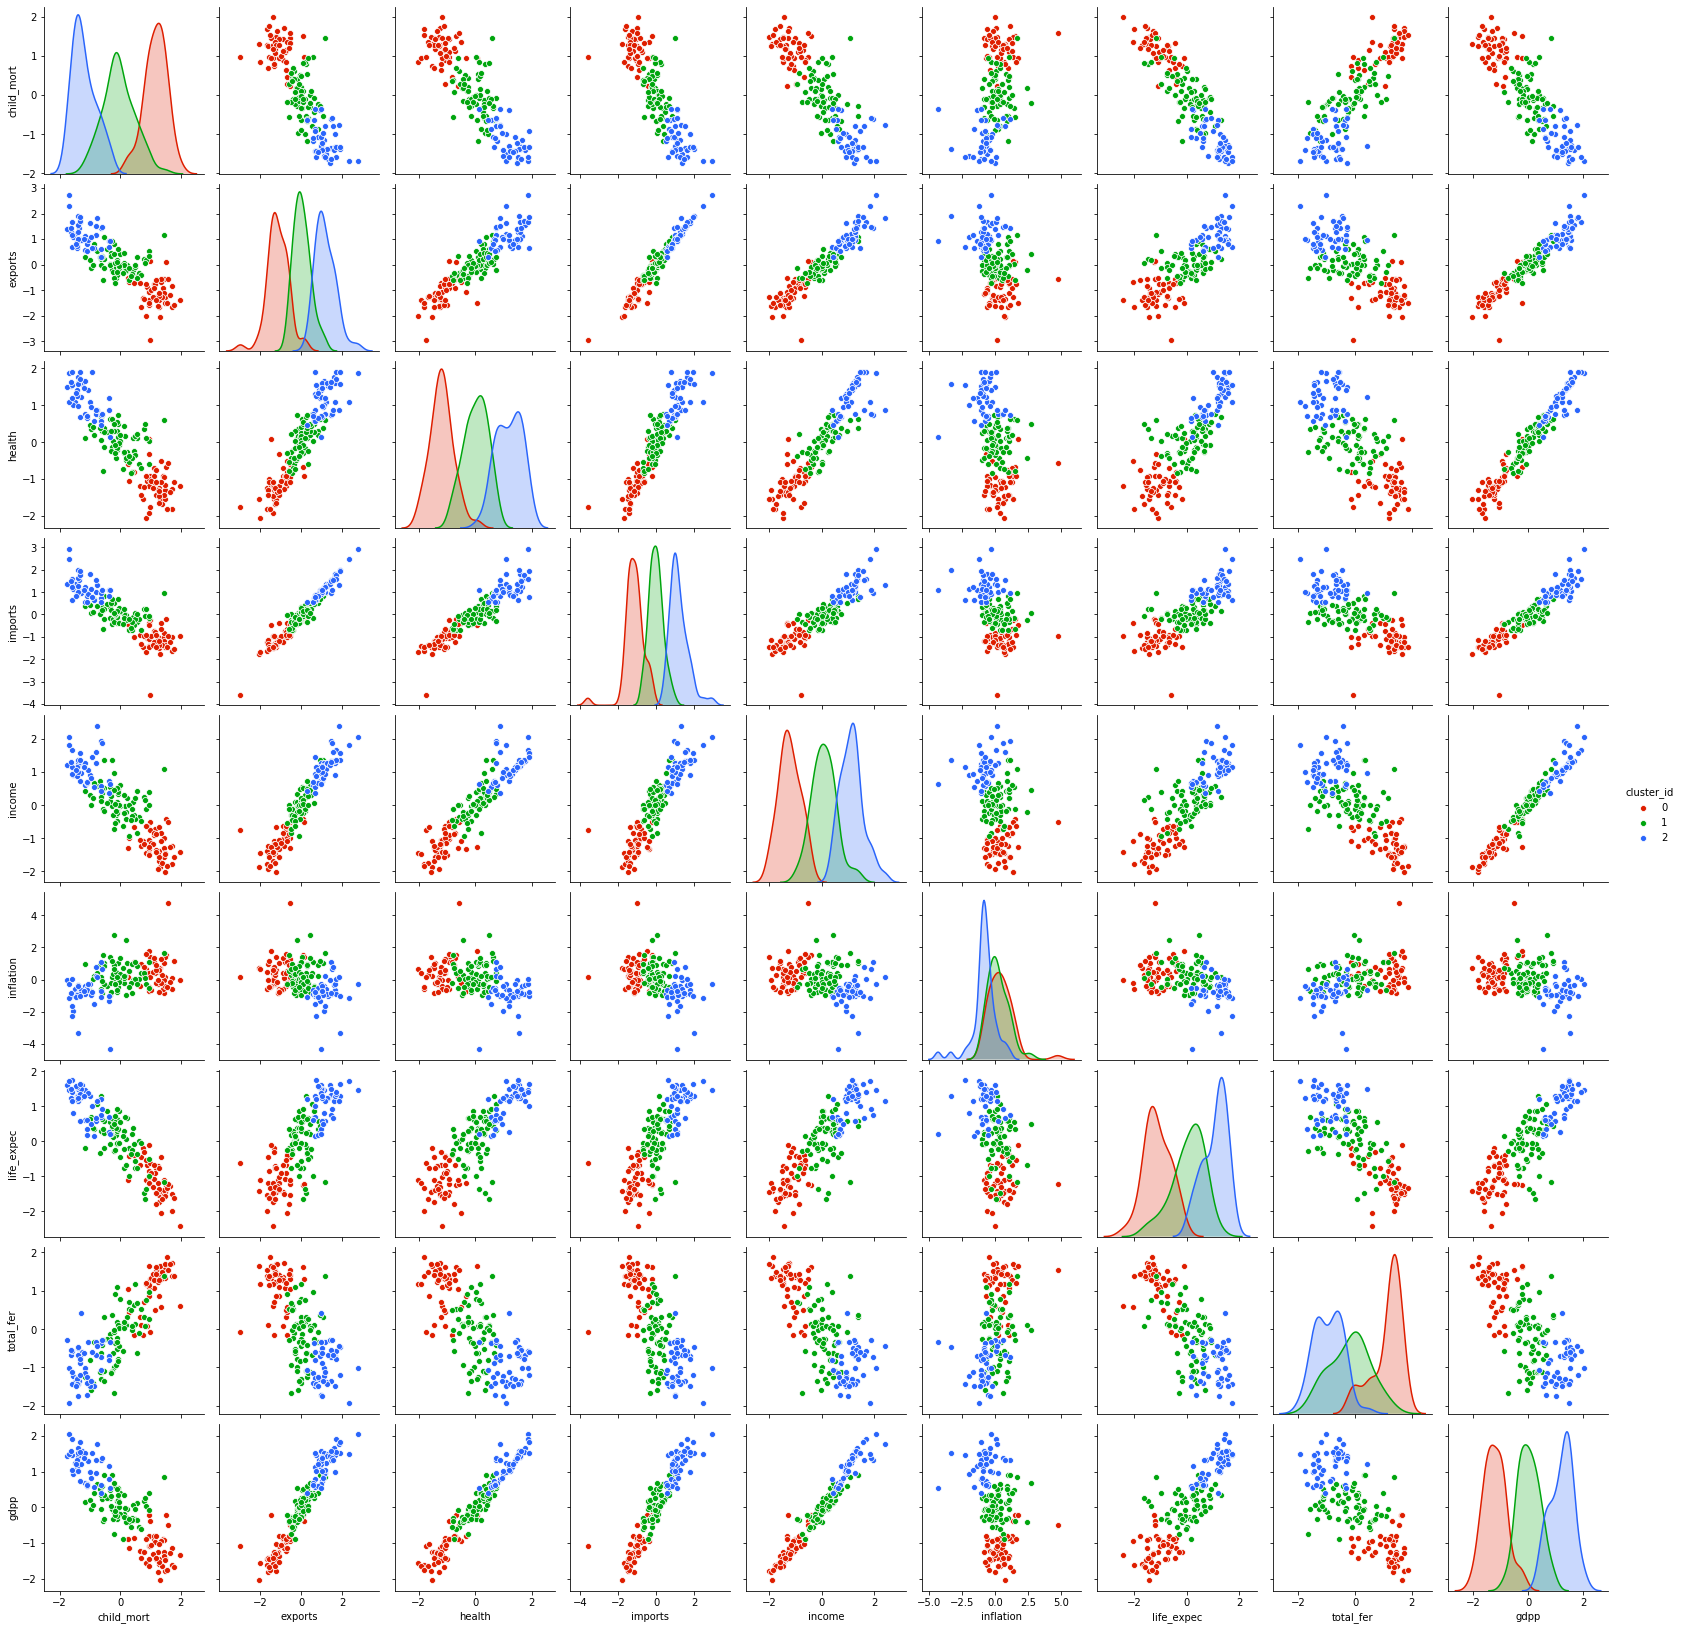

In [33]:
# plotting the pair plot based on 3- clusters
sns.pairplot(finalData_df,diag_kind='kde',hue='cluster_id',palette=sns.color_palette(['#DE1E00','#00A50E','#2A65FB']))
plt.show()

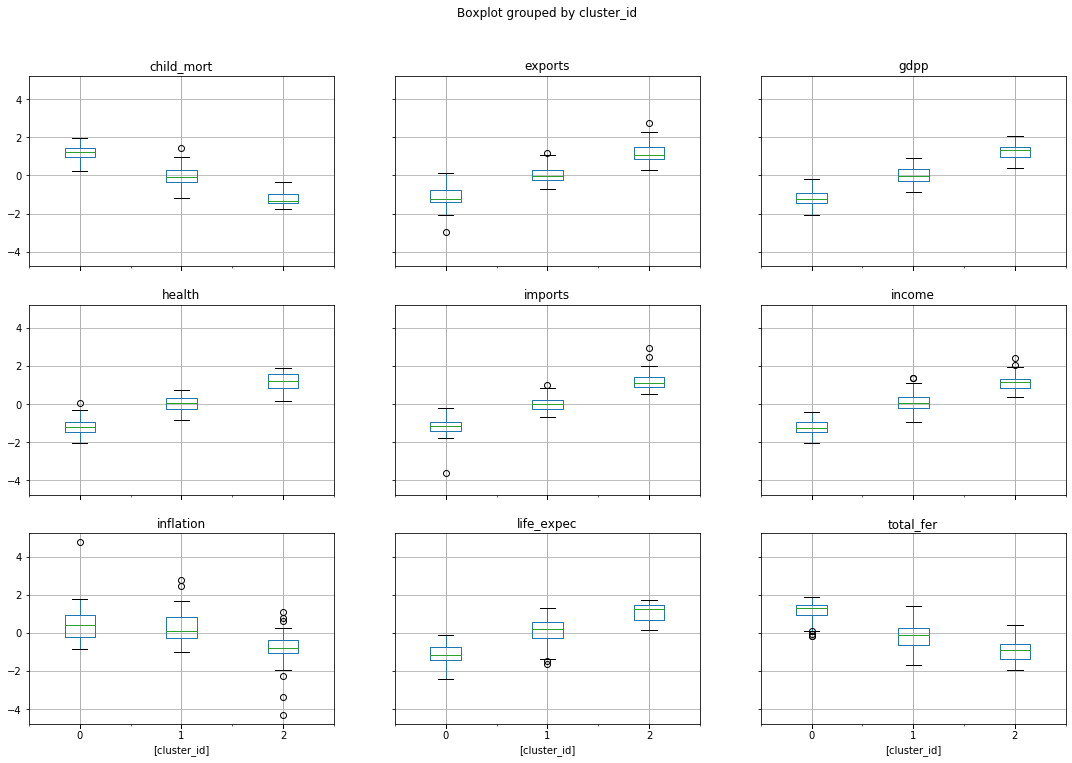

In [34]:
# creating the boxplot based on the 3 clusters
finalData_df.boxplot(by = 'cluster_id',layout=(3,3), figsize=(18, 12))
plt.show()

Observations:
    - We can see a clear relationship between health, export, imports, income, life_expec  and child_mort.
    - Higher the health/exports/imports/income/life_expec, Lower the child_most.
    - Cluster 0 has the highest child_most(child deaths) compared to other groups, so the countries belonging to this group needs to be looked into first.

#### Note: Now we will go ahead with k=3. Since, the clusters are looking more significant and we can divide the clusters into low, mid and high range.

In [35]:
# putting the cluster id's in the main data set
main_df = country_df.copy(deep=True)
main_df['cluster_id'] =kmeans.labels_
main_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           1  
2      16.10        76.5       2.89   4460           1  
3      22.40        60.1       6.16   3530           0  
4       1.44        76.8       2.13  12200           2

In [36]:
main_df.cluster_id.value_counts()

1    70
0    50
2    47
Name: cluster_id, dtype: int64

#### Now lets observe the different clusters

#### 6.1 Cluster 0 (low)

In [37]:
main_df[main_df.cluster_id==0]

country  child_mort     exports    health      imports  \
0                 Afghanistan        90.2    55.30000   41.9174   248.297000   
3                      Angola       119.0  2199.19000  100.6050  1514.370000   
12                 Bangladesh        49.4   121.28000   26.6816   165.244000   
17                      Benin       111.0   180.40400   31.0780   281.976000   
25               Burkina Faso       116.0   110.40000   38.7550   170.200000   
26                    Burundi        93.6    20.60520   26.7960    90.552000   
27                   Cambodia        44.4   425.22600   44.6448   467.670000   
28                   Cameroon       108.0   290.82000   67.2030   353.700000   
31   Central African Republic       149.0    52.62800   17.7508   118.190000   
32                       Chad       150.0   330.09600   40.6341   390.195000   
36                    Comoros        88.2   126.88500   34.6819   397.573000   
37           Congo, Dem. Rep.       116.0   137.27400   26.4194   165.664000   
38                Congo, Rep.        63.9  2331.74000   67.4040  1498.780000   
40              Cote d'Ivoire       111.0   617.32000   64.6600   528.260000   
50                    Eritrea        55.2    23.08780   12.8212   112.306000   
56                     Gambia        80.3   133.75600   31.9778   239.974000   
59                      Ghana        74.7   386.45000   68.3820   601.290000   
63                     Guinea       109.0   196.34400   31.9464   279.936000   
64              Guinea-Bissau       114.0    81.50300   46.4950   192.544000   
66                      Haiti       208.0   101.28600   45.7442   428.314000   
69                      India        58.8   305.10000   54.6750   365.850000   
80                      Kenya        62.2   200.16900   45.9325   324.912000   
81                   Kiribati        62.7   198.17000  168.3700  1190.510000   
83            Kyrgyz Republic        29.6   454.08000   54.3840   718.960000   
84                        Lao        78.9   403.56000   50.9580   562.020000   
87                    Lesotho        99.7   460.98000  129.8700  1181.700000   
88                    Liberia        89.3    62.45700   38.5860   302.802000   
93                 Madagascar        62.2   103.25000   15.5701   177.590000   
94                     Malawi        90.5   104.65200   30.2481   160.191000   
97                       Mali       137.0   161.42400   35.2584   248.508000   
99                 Mauritania        97.4   608.40000   52.9200   734.400000   
106                Mozambique       101.0   131.98500   21.8299   193.578000   
107                   Myanmar        64.4     1.07692   19.4636     0.651092   
109                     Nepal        47.0    56.71360   31.0800   215.488000   
112                     Niger       123.0    77.25600   17.9568   170.868000   
113                   Nigeria       130.0   589.49000  118.1310   405.420000   
116                  Pakistan        92.1   140.40000   22.8800   201.760000   
126                    Rwanda        63.6    67.56000   59.1150   168.900000   
129                   Senegal        66.8   249.00000   56.6000   403.000000   
132              Sierra Leone       160.0    67.03200   52.2690   137.655000   
136           Solomon Islands        28.1   635.97000  110.2950  1047.480000   
142                     Sudan        76.7   291.56000   93.5360   254.560000   
146                Tajikistan        52.4   109.96200   44.1324   432.468000   
147                  Tanzania        71.9   131.27400   42.1902   204.282000   
149               Timor-Leste        62.6    79.20000  328.3200  1000.800000   
150                      Togo        90.3   196.17600   37.3320   279.624000   
155                    Uganda        81.0   101.74500   53.6095   170.170000   
161                Uzbekistan        36.3   437.46000   80.1780   393.300000   
165                     Yemen        56.3   393.00000   67.8580   450.640000   
166                   

In [38]:
main_df[main_df.cluster_id==0].describe()

child_mort      exports      health      imports       income  \
count   50.000000    50.000000   50.000000    50.000000    50.000000   
mean    88.116000   305.617950   57.722802   415.885242  2314.660000   
std     35.749973   441.119648   50.134655   350.721930  1302.425486   
min     28.100000     1.076920   12.821200     0.651092   609.000000   
25%     62.625000   101.400750   31.296600   181.328500  1395.000000   
50%     85.650000   150.912000   45.194500   292.389000  1900.000000   
75%    110.500000   391.362500   66.567250   451.015000  2992.500000   
max    208.000000  2331.740000  328.320000  1514.370000  5900.000000   

       inflation  life_expec  total_fer         gdpp  cluster_id  
count   50.00000   50.000000   50.00000    50.000000        50.0  
mean    11.50370   60.544000    4.76960   998.880000         0.0  
std     14.93474    6.948621    1.25499   721.759688         0.0  
min      0.88500   32.100000    2.33000   231.000000         0.0  
25%      4.18750   57.350000    3.94750   555.250000         0.0  
50%      8.88500   60.750000    5.00000   763.500000         0.0  
75%     14.82500   65.800000    5.52750  1272.500000         0.0  
max    104.00000   71.100000    7.49000  3600.000000         0.0

#### 6.2 Cluster 1 (mid)

In [39]:
main_df[main_df.cluster_id==1]

country  child_mort   exports    health   imports  \
1                           Albania        16.6   1145.20   267.895   1987.74   
2                           Algeria        27.3   1712.64   185.982   1400.44   
5                         Argentina        14.5   1946.70   834.300   1648.00   
6                           Armenia        18.1    669.76   141.680   1458.66   
9                        Azerbaijan        39.2   3171.12   343.392   1208.88   
14                          Belarus         5.5   3099.42   338.283   3889.35   
16                           Belize        18.8   2525.88   225.680   2495.50   
18                           Bhutan        42.7    926.50   113.360   1541.26   
19                          Bolivia        46.6    815.76    95.832    679.14   
20           Bosnia and Herzegovina         6.9   1369.17   511.710   2364.93   
21                         Botswana        52.5   2768.60   527.050   3257.55   
22                           Brazil        19.8   1198.40  1009.120   1321.60   
24                         Bulgaria        10.8   3433.68   469.908   3625.20   
30                       Cape Verde        26.5   1082.37   135.379   2045.58   
33                            Chile         8.7   4863.30  1026.840   4037.70   
34                            China        15.7   1199.28   231.192   1030.56   
35                         Colombia        18.6    993.75   474.375   1112.50   
39                       Costa Rica        10.2   2722.40   893.800   2870.00   
45               Dominican Republic        34.4   1237.15   338.990   1814.85   
46                          Ecuador        25.1   1300.14   375.596   1509.84   
47                            Egypt        29.1    553.80   121.160    691.60   
48                      El Salvador        19.2    804.31   206.609   1393.34   
49                Equatorial Guinea       111.0  14671.80   766.080  10071.90   
52                             Fiji        24.1   2109.70   177.390   2332.35   
55                            Gabon        63.7   5048.75   306.250   1653.75   
57                          Georgia        16.5   1036.00   298.960   1562.88   
61                          Grenada        14.6   1754.06   431.882   3626.04   
62                        Guatemala        35.4    730.14   193.855   1027.29   
65                           Guyana        37.6   1562.56   163.552   2404.64   
70                        Indonesia        33.3    755.73    81.171    696.64   
71                             Iran        19.3   1593.32   365.680   1266.82   
72                             Iraq        36.9   1773.00   378.450   1534.50   
76                          Jamaica        18.1   1464.84   225.108   2321.28   
78                           Jordan        21.1   1777.44   295.872   2539.20   
79                       Kazakhstan        21.5   4008.94   389.103   2711.93   
89                            Libya        16.6   7937.60   469.480   5094.10   
92                   Macedonia, FYR        10.4   1806.92   321.886   2637.74   
95                         Malaysia         7.9   7881.83   398.173   6439.70   
96                         Maldives        13.2   5509.60   449.430   4643.40   
100                       Mauritius        15.0   4096.00   480.000   4976.00   
101           Micronesia, Fed. Sts.        40.0    672.10   406.120   2316.60   
102                         Moldova        17.2    638.96   190.710   1279.55   
103                        Mongolia        26.1   1237.55   144.160   1502.55   
104                      Montenegro         6.8   2471.60   608.548   4188.36   
105                         Morocco        33.5    911.26   147.160   1216.90   
108                         Namibia        56.0   2480.82   351.882   3150.33   
115                            Oman        11.7  12680.10   534.610   7951.60   
117                          Panama        19.7   5656.00   654.480   6318.56   
118                        Paraguay        24.1   1779.73  

In [40]:
main_df[main_df.cluster_id==1].describe()

child_mort       exports       health       imports        income  \
count   70.000000     70.000000    70.000000     70.000000     70.000000   
mean    24.377143   2639.129571   377.538386   2571.104571  12613.285714   
std     17.038100   2638.355586   243.110829   1748.545887   8079.033828   
min      5.500000    440.200000    76.893000    679.140000   2950.000000   
25%     14.675000   1098.077500   189.878250   1469.632500   7440.000000   
50%     19.150000   1775.220000   330.084500   2199.175000  10450.000000   
75%     29.175000   3128.375000   503.782500   3134.907500  15400.000000   
max    111.000000  14671.800000  1026.840000  10071.900000  45400.000000   

       inflation  life_expec  total_fer          gdpp  cluster_id  
count  70.000000   70.000000  70.000000     70.000000        70.0  
mean    8.895729   72.015714   2.462714   6175.857143         1.0  
std     8.252555    5.223321   0.813076   3948.887017         0.0  
min     0.480000   54.300000   1.270000   1310.000000         1.0  
25%     3.710000   69.900000   1.890000   3222.500000         1.0  
50%     6.460000   73.450000   2.395000   4850.000000         1.0  
75%    13.075000   75.800000   2.805000   8060.000000         1.0  
max    45.900000   80.400000   5.210000  19300.000000         1.0

#### 6.3 Cluster 2 (high)

In [41]:
main_df[main_df.cluster_id==2]

country  child_mort    exports    health    imports  income  \
4     Antigua and Barbuda        10.3    5551.00   735.660    7185.80   19100   
7               Australia         4.8   10276.20  4530.870   10847.10   41400   
8                 Austria         4.3   24059.70  5159.000   22418.20   43200   
10                Bahamas        13.8    9800.00  2209.200   12236.00   22900   
11                Bahrain         8.6   14386.50  1028.790   10536.30   41100   
13               Barbados        14.2    6320.00  1275.200    7792.00   15300   
15                Belgium         4.5   33921.60  4750.800   33166.80   41100   
23                 Brunei        10.5   23792.20  1002.520    9884.00   80600   
29                 Canada         5.6   13793.40  5356.200   14694.00   40700   
41                Croatia         5.5    5076.00  1047.600    5143.50   20100   
42                 Cyprus         3.6   15461.60  1838.760   17710.00   33900   
43         Czech Republic         3.4   13068.00  1560.240   12454.20   28300   
44                Denmark         4.1   29290.00  6612.000   25288.00   44000   
51                Estonia         4.5   10964.60   880.380   10030.20   22700   
53                Finland         3.0   17879.40  4134.900   17278.80   39800   
54                 France         4.2   10880.80  4831.400   11408.60   36900   
58                Germany         4.2   17681.40  4848.800   15507.80   40400   
60                 Greece         3.9    5944.90  2770.700    8258.30   28700   
67                Hungary         6.0   10715.80   960.230   10021.50   22300   
68                Iceland         2.6   22374.60  3938.600   18142.70   38800   
73                Ireland         4.2   50161.00  4475.530   42125.50   45700   
74                 Israel         4.6   10710.00  2334.780   10067.40   29600   
75                  Italy         4.0    9021.60  3411.740    9737.60   36200   
77                  Japan         3.2    6675.00  4223.050    6052.00   35800   
82                 Kuwait        10.8   25679.50  1012.550   11704.00   75200   
85                 Latvia         7.8    6068.10   754.840    6226.30   18300   
86                Lebanon        10.3    3171.88   622.858    5333.72   16300   
90              Lithuania         6.1    7836.00   844.800    8064.00   21100   
91             Luxembourg         2.8  183750.00  8158.500  149100.00   91700   
98                  Malta         6.8   32283.00  1825.150   32494.00   28300   
110           Netherlands         4.5   36216.00  5985.700   31990.80   45500   
111           New Zealand         6.2   10211.10  3403.700    9436.00   32300   
114                Norway         3.2   34856.60  8323.440   25023.00   62300   
121                Poland         6.0    5052.60   939.960    5304.60   21800   
122              Portugal         3.9    6727.50  2475.000    8415.00   27200   
123                 Qatar         9.0   43796.90  1272.430   16731.40  125000   
131            Seychelles        14.4   10130.40   367.200   11664.00   20400   
133             Singapore         2.8   93200.00  1845.360   81084.00   72100   
134       Slovak Republic         7.0   12665.80  1459.140   12914.80   25200   
135              Slovenia         3.2   15046.20  2201.940   14718.60   28700   
138           South Korea         4.1   10917.40  1531.530   10210.20   30400   
139                 Spain         3.8    7828.50  2928.780    8227.60   32500   
144                Sweden         3.0   24070.20  5017.230   21204.70   42900   
145           Switzerland         4.5   47744.00  8579.000   39761.80   55500   
157  United Arab Emirates         8.6   27195.00  1281.000   22260.00   57600   
158        United Kingdom         5.2   10969.80  3749.960   11981.20   36200   
159         United States         7.3    6001.60  8663.600    7647.20   49400   

     inflation  life_expec  total_fer    gdpp  cluster_id  
4        1.440        76.8       2.13   12200           2  
7        

In [42]:
main_df[main_df.cluster_id==2].describe()

child_mort        exports       health        imports         income  \
count   47.000000      47.000000    47.000000      47.000000      47.000000   
mean     5.934043   22111.135745  3131.076979   19137.940851   39670.212766   
std      3.109822   29066.467808  2331.505171   23438.147391   21276.890044   
min      2.600000    3171.880000   367.200000    5143.500000   15300.000000   
25%      3.900000    8428.800000  1160.015000    8925.500000   26200.000000   
50%      4.500000   12665.800000  2334.780000   11704.000000   36200.000000   
75%      7.150000   24874.850000  4640.835000   19673.700000   43600.000000   
max     14.400000  183750.000000  8663.600000  149100.000000  125000.000000   

       inflation  life_expec  total_fer           gdpp  cluster_id  
count  47.000000   47.000000  47.000000      47.000000        47.0  
mean    2.163404   79.031915   1.732766   35803.404255         2.0  
std     3.779810    2.728999   0.356058   20728.080647         0.0  
min    -4.210000   73.100000   1.150000    8860.000000         2.0  
25%     0.320000   76.750000   1.435000   20250.000000         2.0  
50%     1.160000   80.000000   1.720000   35000.000000         2.0  
75%     3.015000   81.150000   1.940000   46750.000000         2.0  
max    16.700000   82.800000   3.030000  105000.000000         2.0

## 7. Hierarchical Clustering

We will be using simple and compelete linkage for Hierarchical clustering.
- In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster.
- In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster.


In [43]:
powerTrans_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   0.459416   -1.526455   
1   -0.220994 -0.238427 -0.042924 -0.055108  0.012538  -0.154659    0.621738   
2    0.217834 -0.030785 -0.270052 -0.266188  0.232275   1.059790    0.652698   
3    1.506186  0.100544 -0.661987 -0.219429 -0.408251   1.512843   -1.239045   
4   -0.637380  0.602677  0.563269  0.758134  0.572583  -0.723442    0.699553   

   total_fer      gdpp  
0   1.544053 -1.462273  
1  -0.992833 -0.121133  
2   0.313175 -0.063195  
3   1.623128 -0.219666  
4  -0.368063  0.609228

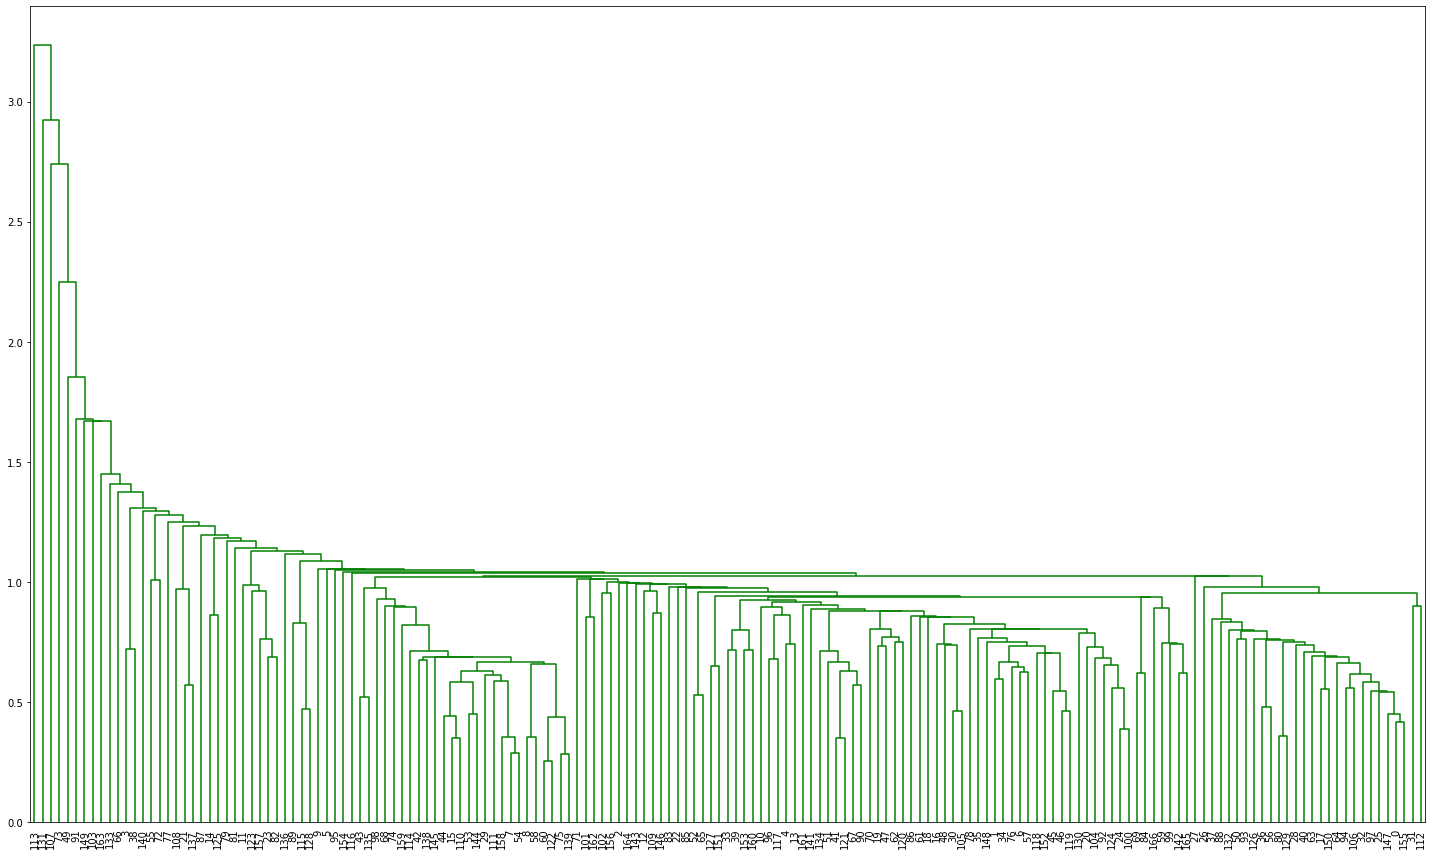

In [44]:
# single linkage
plt.figure(figsize=(25,15))
mergings = linkage(powerTrans_df, method="single", metric='euclidean')
dendrogram(mergings,leaf_rotation=90.0,leaf_font_size=10,color_threshold=7)
plt.show()

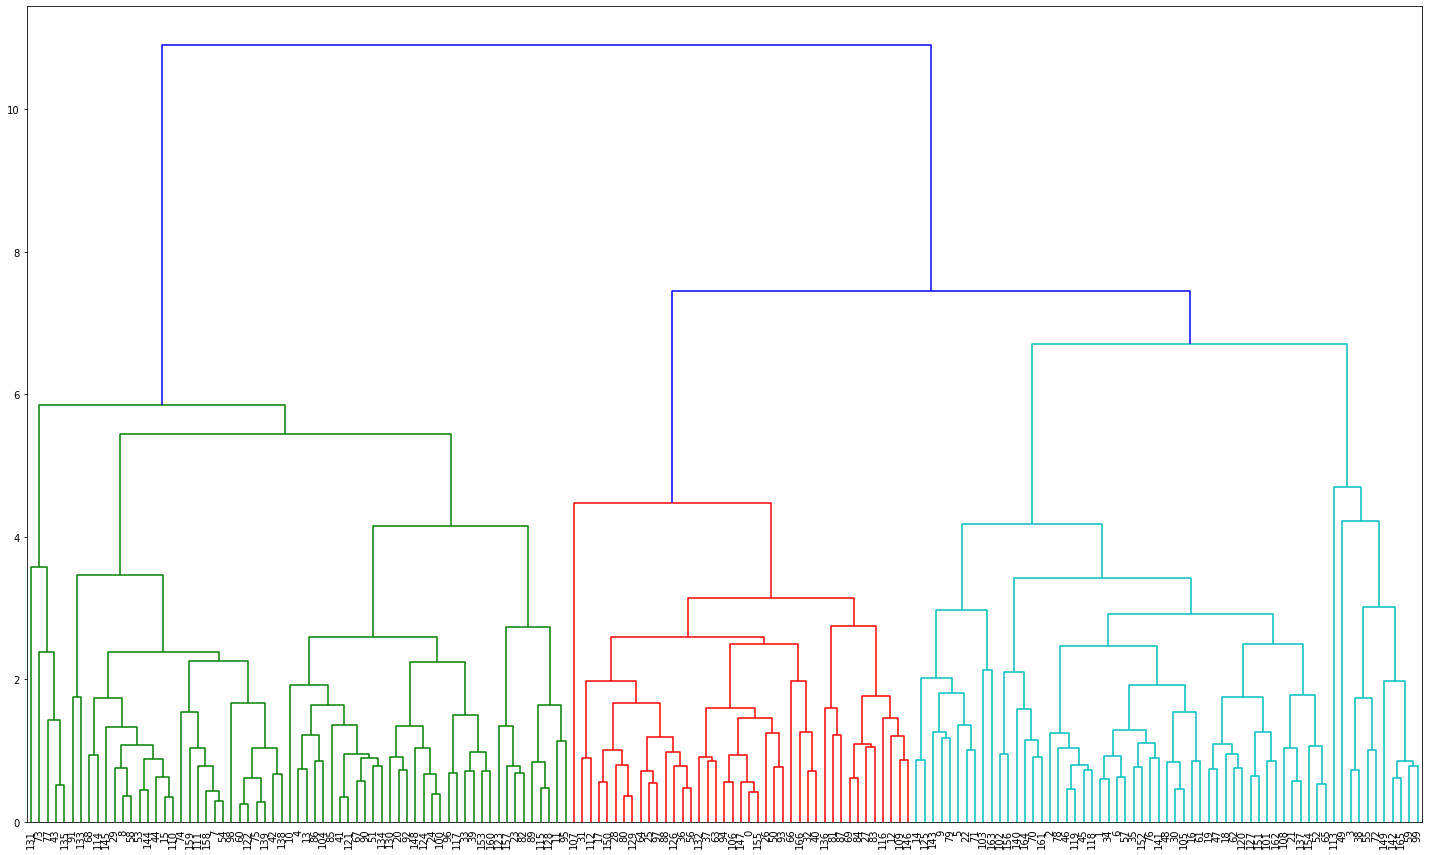

In [45]:
# complete linkage
plt.figure(figsize=(25,15))
mergings = linkage(powerTrans_df, method="complete", metric='euclidean')
dendrogram(mergings,leaf_rotation=90.0,leaf_font_size=10,color_threshold=7)
plt.show()

#### We will cut the dendrogram from 6 and will make 4 clusters

In [46]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 2, 3, 1, 1, 3, 3, 1, 3, 3, 0, 3, 1, 3, 1, 0, 1, 1, 3, 1,
       1, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 3, 1, 1, 0, 0, 2, 3, 0, 3, 3, 3,
       3, 1, 1, 1, 1, 2, 0, 3, 1, 3, 3, 2, 0, 1, 3, 2, 3, 1, 1, 0, 0, 1,
       0, 3, 3, 0, 1, 1, 2, 3, 3, 3, 1, 3, 1, 1, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 2, 3, 1, 1, 1, 3, 1, 0, 0, 1, 0,
       3, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 3, 3, 3, 3, 1, 0, 1, 3, 0, 3, 3,
       0, 3, 3, 3, 0, 1, 3, 3, 1, 1, 2, 1, 3, 3, 0, 0, 3, 2, 0, 1, 1, 3,
       1, 0, 1, 3, 3, 3, 3, 1, 1, 1, 1, 2, 0])

In [47]:
# assign the label to the main data frame
final_df_dendro_4 = pd.concat([country_df[['country']],powerTrans_df],axis=1)
final_df_dendro_4['cluster_id'] =cluster_labels
final_df_dendro_4.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   
1              Albania   -0.220994 -0.238427 -0.042924 -0.055108  0.012538   
2              Algeria    0.217834 -0.030785 -0.270052 -0.266188  0.232275   
3               Angola    1.506186  0.100544 -0.661987 -0.219429 -0.408251   
4  Antigua and Barbuda   -0.637380  0.602677  0.563269  0.758134  0.572583   

   inflation  life_expec  total_fer      gdpp  cluster_id  
0   0.459416   -1.526455   1.544053 -1.462273           0  
1  -0.154659    0.621738  -0.992833 -0.121133           1  
2   1.059790    0.652698   0.313175 -0.063195           1  
3   1.512843   -1.239045   1.623128 -0.219666           2  
4  -0.723442    0.699553  -0.368063  0.609228           3

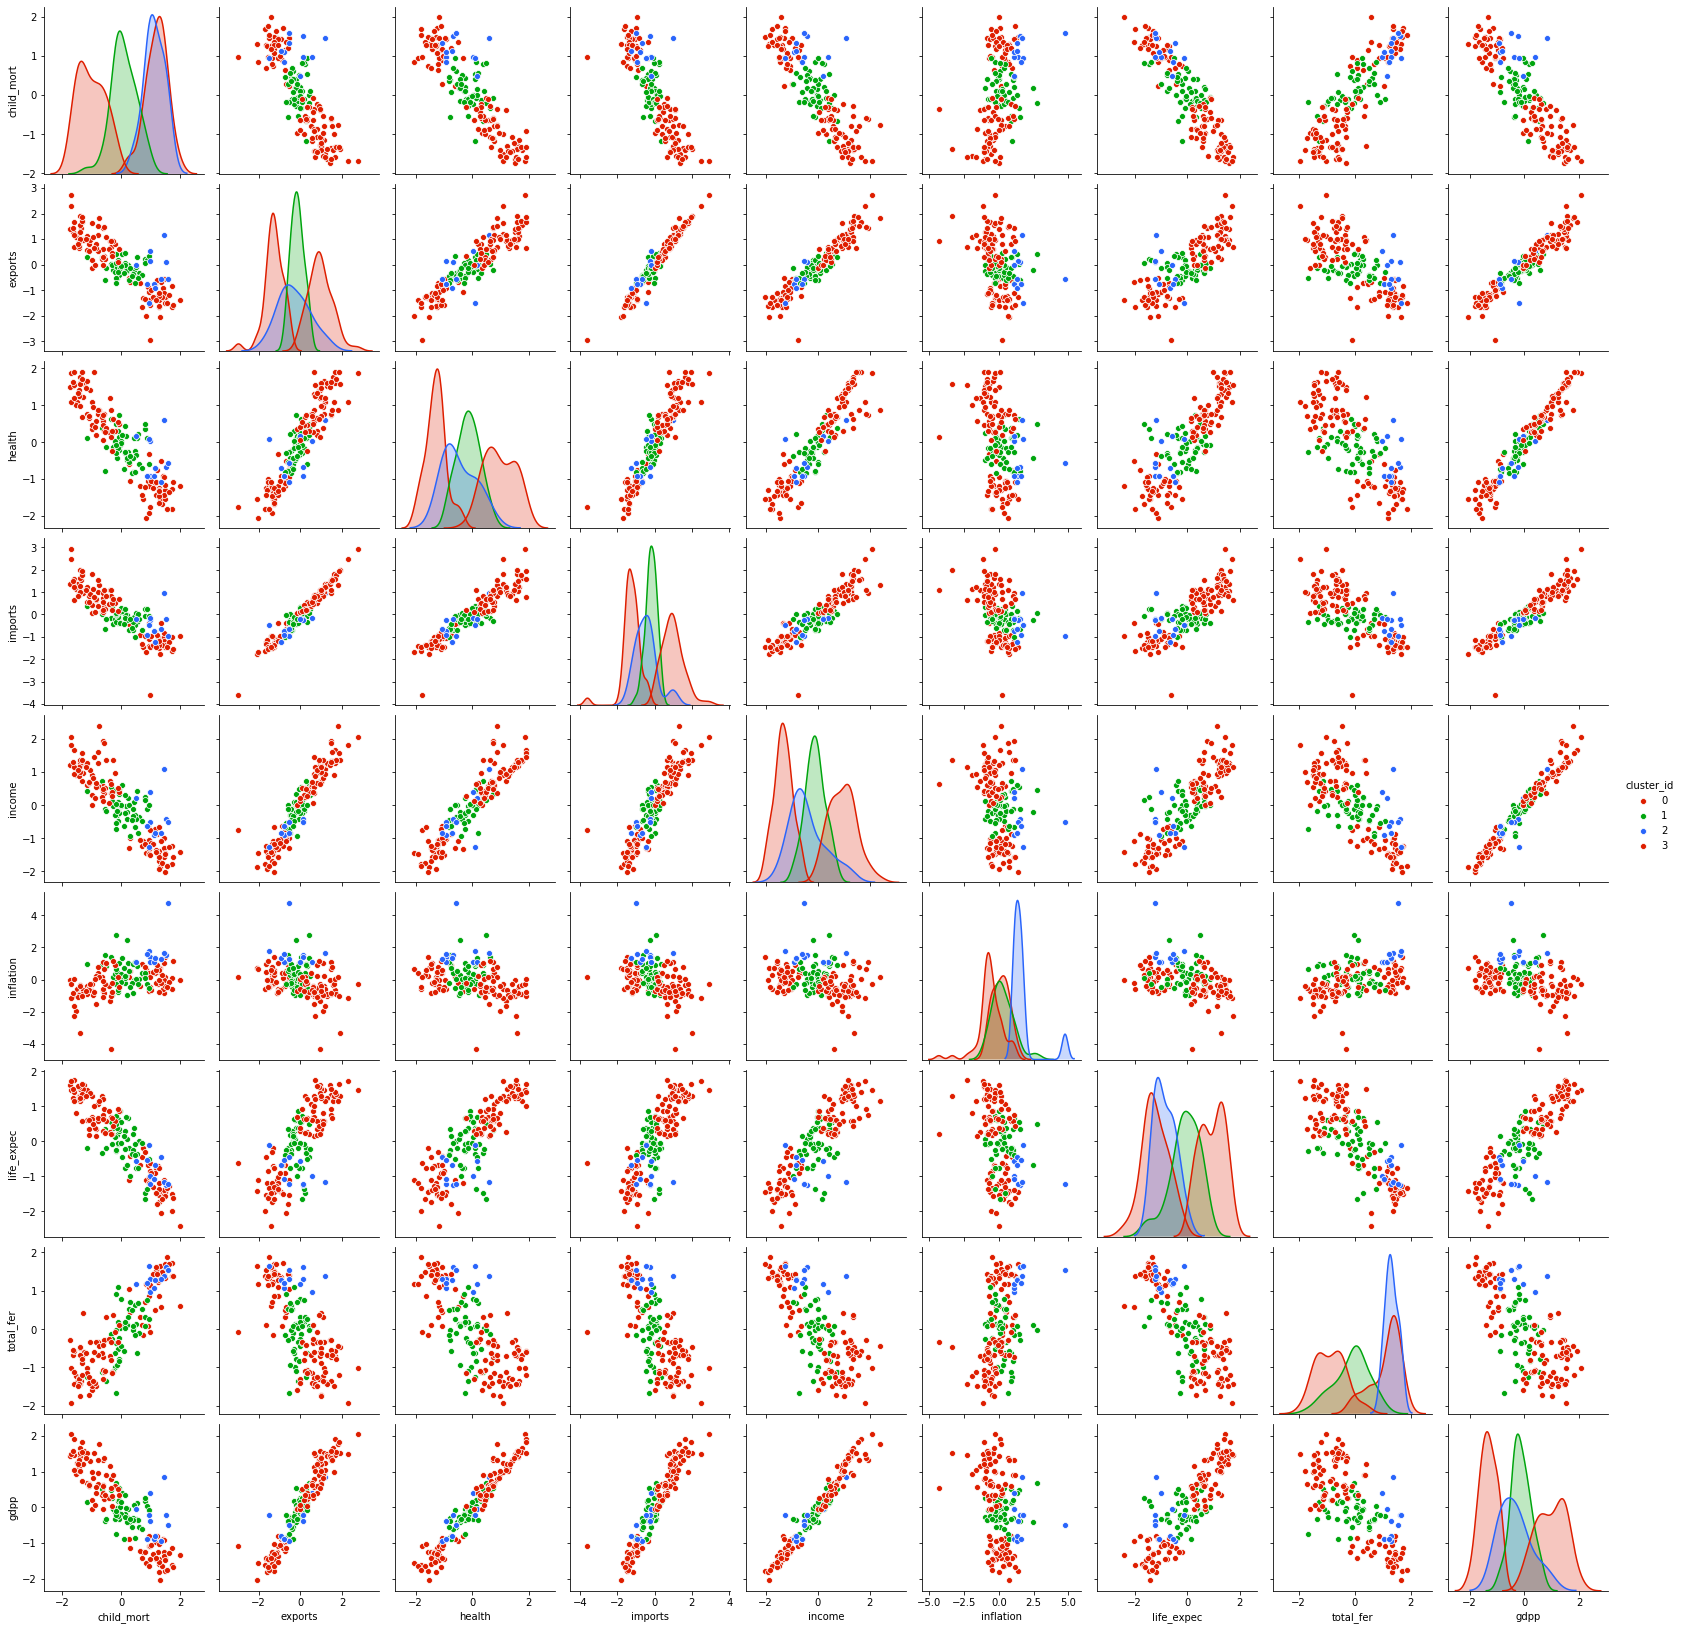

In [48]:
# plotting the pair plot based on 4-clusters
sns.pairplot(final_df_dendro_4,diag_kind='kde',hue='cluster_id',palette=sns.color_palette(['#DE1E00','#00A50E','#2A65FB']))
plt.show()

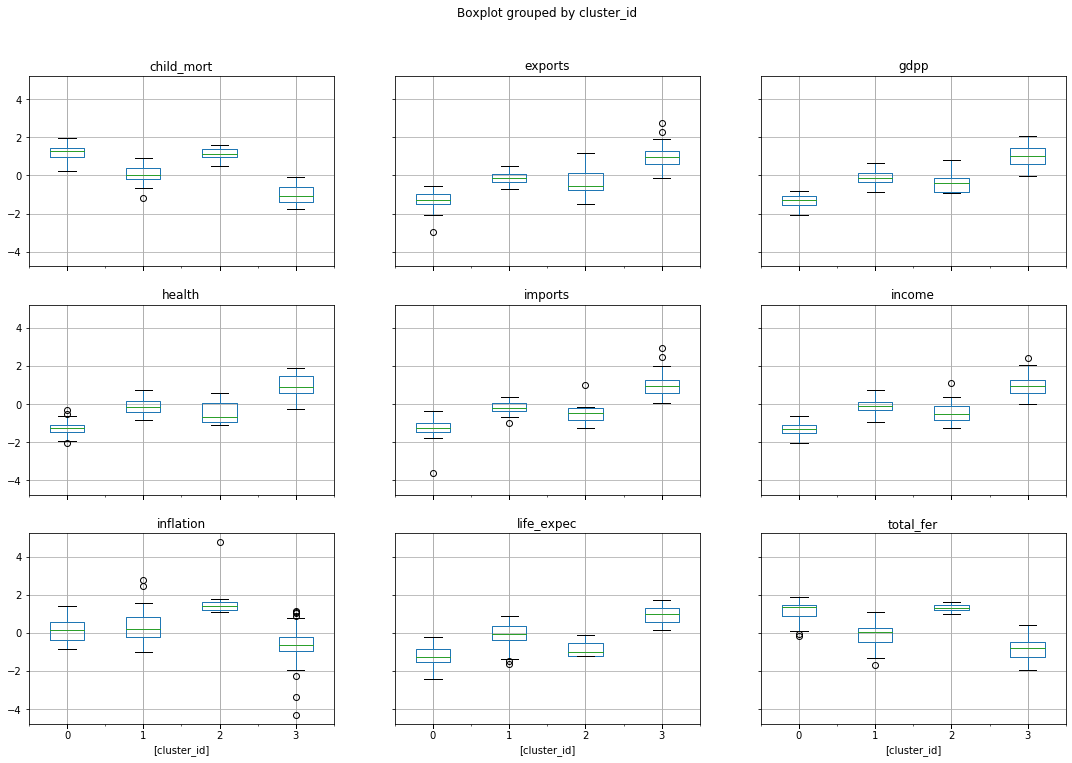

In [49]:
# creating the boxplot based on the 4 clusters
final_df_dendro_4.boxplot(by = 'cluster_id',layout=(3,3), figsize=(18, 12))
plt.show()

In [50]:
final_df_dendro_4.cluster_id.value_counts()

3    65
1    50
0    41
2    11
Name: cluster_id, dtype: int64

Here we can see that the 4th cluster is very small. So will try with 3 clusters

#### We will cut the dendrogram from 7 and will make 3 clusters

In [51]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0])

In [52]:
# assign the label to the main data frame
final_df_dendro = pd.concat([country_df[['country']],powerTrans_df],axis=1)
final_df_dendro['cluster_id'] =cluster_labels
final_df_dendro.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   
1              Albania   -0.220994 -0.238427 -0.042924 -0.055108  0.012538   
2              Algeria    0.217834 -0.030785 -0.270052 -0.266188  0.232275   
3               Angola    1.506186  0.100544 -0.661987 -0.219429 -0.408251   
4  Antigua and Barbuda   -0.637380  0.602677  0.563269  0.758134  0.572583   

   inflation  life_expec  total_fer      gdpp  cluster_id  
0   0.459416   -1.526455   1.544053 -1.462273           0  
1  -0.154659    0.621738  -0.992833 -0.121133           1  
2   1.059790    0.652698   0.313175 -0.063195           1  
3   1.512843   -1.239045   1.623128 -0.219666           1  
4  -0.723442    0.699553  -0.368063  0.609228           2

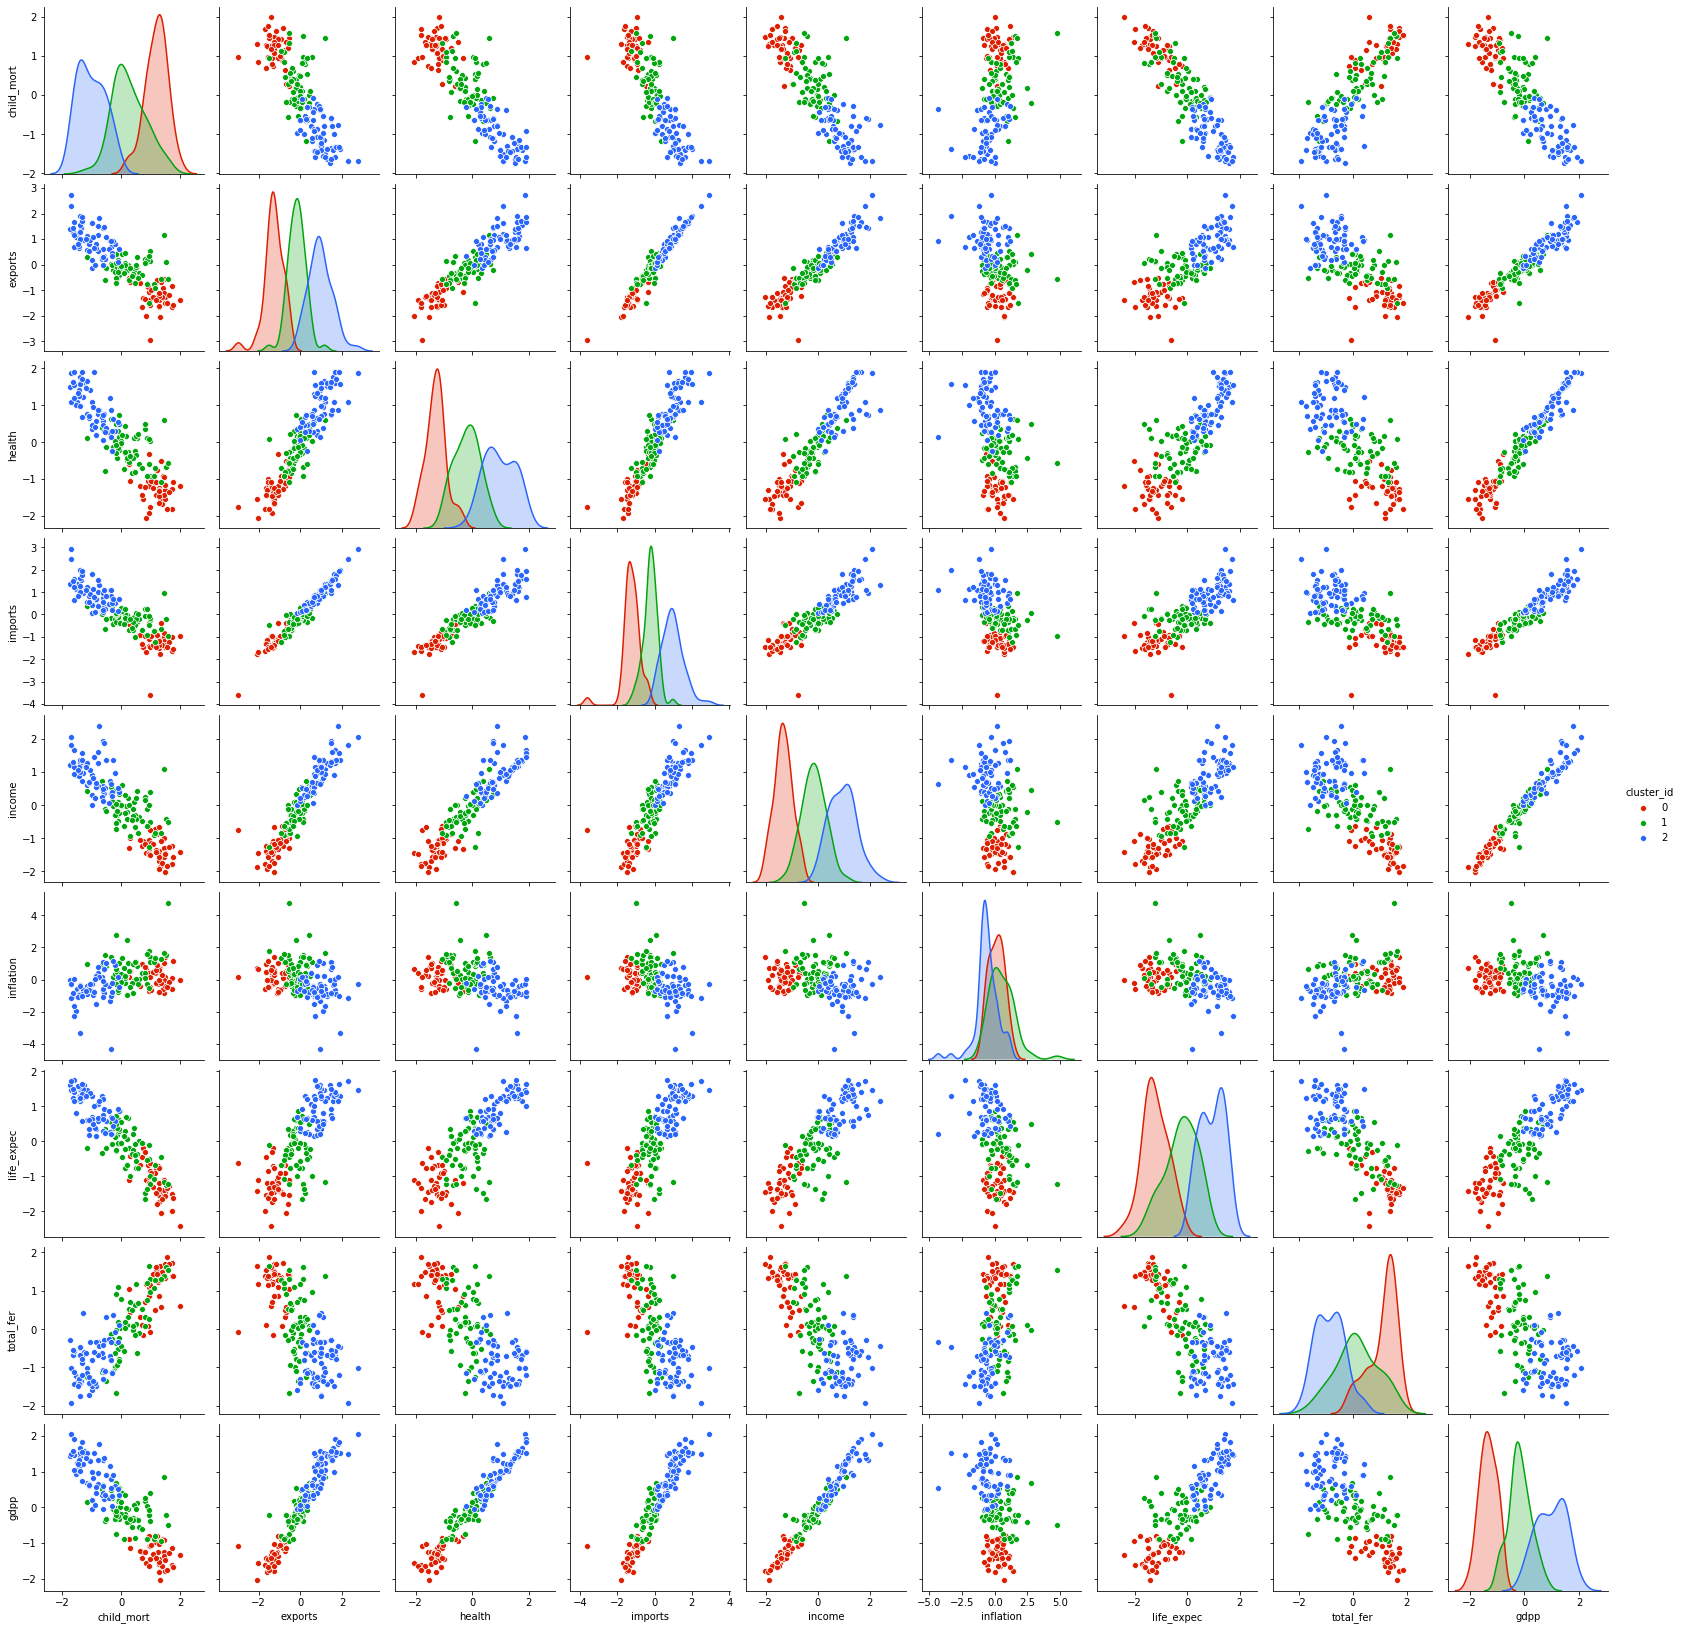

In [53]:
# plotting the pair plot based on 3- clusters
sns.pairplot(final_df_dendro,diag_kind='kde',hue='cluster_id',palette=sns.color_palette(['#DE1E00','#00A50E','#2A65FB']))
plt.show()

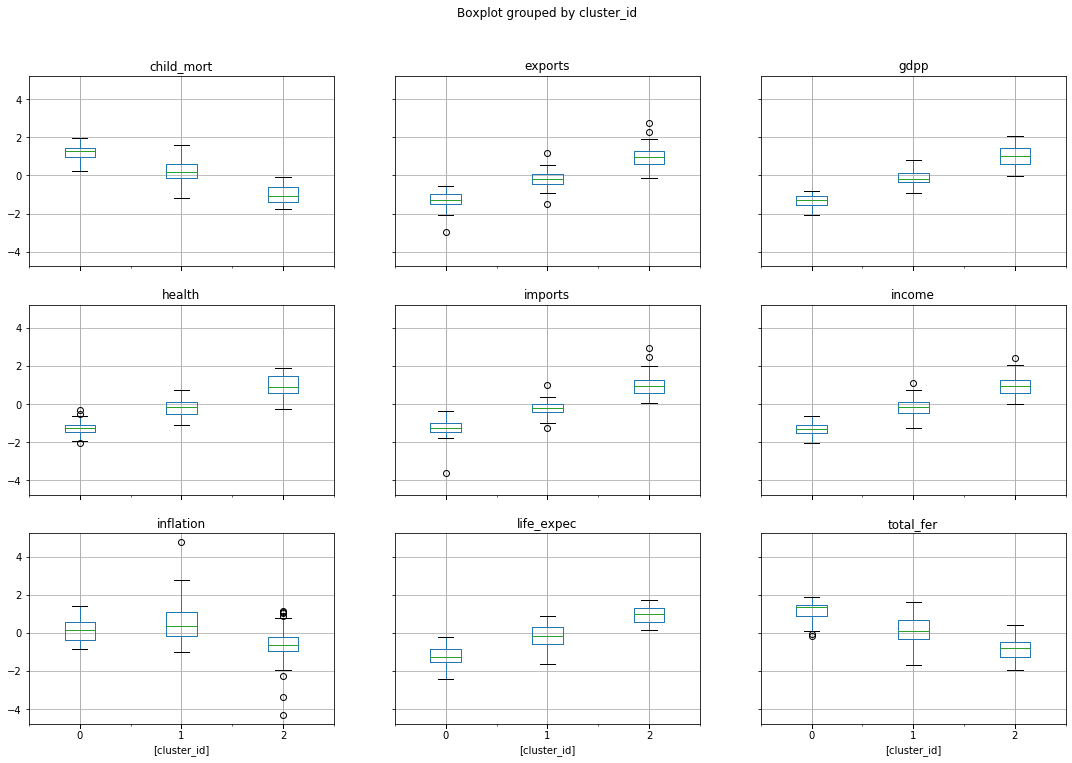

In [54]:
# creating the boxplot based on the 3 clusters
final_df_dendro.boxplot(by = 'cluster_id',layout=(3,3), figsize=(18, 12))
plt.show()

Observations:
    - We can see there is clear relationship between the gdpp, income, child_mort & health. Higher the gdpp, higher the income, higher the total spending on the health related areas and lower the child_mort rate.
    - Cluster 0 has the lowest spread of income, gdpp, health and highest child deaths compared to other groups, so the countries belonging to this group needs to be looked into first.

In [55]:
# putting the cluster id's in the main data set
main_df_hier = country_df.copy(deep=True)
main_df_hier['cluster_id'] =cluster_labels
main_df_hier.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           1  
2      16.10        76.5       2.89   4460           1  
3      22.40        60.1       6.16   3530           1  
4       1.44        76.8       2.13  12200           2

In [56]:
main_df_hier.cluster_id.value_counts()

2    65
1    61
0    41
Name: cluster_id, dtype: int64

#### Note: 3 clusters are looking more significant and doing justic to the data set.


Observation:
    - There is a difference between K-means and hierarchical.
    

#### Now lets observe the different clusters

#### 7.1 Cluster 0 (low)

In [57]:
main_df_hier[main_df_hier.cluster_id==0]

country  child_mort    exports    health      imports  \
0                 Afghanistan        90.2   55.30000   41.9174   248.297000   
12                 Bangladesh        49.4  121.28000   26.6816   165.244000   
17                      Benin       111.0  180.40400   31.0780   281.976000   
25               Burkina Faso       116.0  110.40000   38.7550   170.200000   
26                    Burundi        93.6   20.60520   26.7960    90.552000   
27                   Cambodia        44.4  425.22600   44.6448   467.670000   
28                   Cameroon       108.0  290.82000   67.2030   353.700000   
31   Central African Republic       149.0   52.62800   17.7508   118.190000   
32                       Chad       150.0  330.09600   40.6341   390.195000   
36                    Comoros        88.2  126.88500   34.6819   397.573000   
37           Congo, Dem. Rep.       116.0  137.27400   26.4194   165.664000   
40              Cote d'Ivoire       111.0  617.32000   64.6600   528.260000   
50                    Eritrea        55.2   23.08780   12.8212   112.306000   
56                     Gambia        80.3  133.75600   31.9778   239.974000   
63                     Guinea       109.0  196.34400   31.9464   279.936000   
64              Guinea-Bissau       114.0   81.50300   46.4950   192.544000   
66                      Haiti       208.0  101.28600   45.7442   428.314000   
69                      India        58.8  305.10000   54.6750   365.850000   
80                      Kenya        62.2  200.16900   45.9325   324.912000   
81                   Kiribati        62.7  198.17000  168.3700  1190.510000   
83            Kyrgyz Republic        29.6  454.08000   54.3840   718.960000   
84                        Lao        78.9  403.56000   50.9580   562.020000   
87                    Lesotho        99.7  460.98000  129.8700  1181.700000   
88                    Liberia        89.3   62.45700   38.5860   302.802000   
93                 Madagascar        62.2  103.25000   15.5701   177.590000   
94                     Malawi        90.5  104.65200   30.2481   160.191000   
97                       Mali       137.0  161.42400   35.2584   248.508000   
106                Mozambique       101.0  131.98500   21.8299   193.578000   
107                   Myanmar        64.4    1.07692   19.4636     0.651092   
109                     Nepal        47.0   56.71360   31.0800   215.488000   
112                     Niger       123.0   77.25600   17.9568   170.868000   
116                  Pakistan        92.1  140.40000   22.8800   201.760000   
126                    Rwanda        63.6   67.56000   59.1150   168.900000   
129                   Senegal        66.8  249.00000   56.6000   403.000000   
132              Sierra Leone       160.0   67.03200   52.2690   137.655000   
136           Solomon Islands        28.1  635.97000  110.2950  1047.480000   
146                Tajikistan        52.4  109.96200   44.1324   432.468000   
147                  Tanzania        71.9  131.27400   42.1902   204.282000   
150                      Togo        90.3  196.17600   37.3320   279.624000   
155                    Uganda        81.0  101.74500   53.6095   170.170000   
166                    Zambia        83.1  540.20000   85.9940   451.140000   

     income  inflation  life_expec  total_fer  gdpp  cluster_id  
0      1610      9.440        56.2       5.82   553           0  
12     2440      7.140        70.4       2.33   758           0  
17     1820      0.885        61.8       5.36   758           0  
25     1430      6.810        57.9       5.87   575           0  
26      764     12.300        57.7       6.26   231           0  
27     2520      3.120        66.1       2.88   786           0  
28     2660      1.910        57.3       5.11  1310           0  
31      888      2.010        47.5       5.21   446           0  
32     1930      6.390        56.5       6.59   897           0  
36     1410      3.870        65.9       4.

In [58]:
main_df_hier[main_df_hier.cluster_id==0].describe()

child_mort     exports      health      imports       income  \
count   41.000000   41.000000   41.000000    41.000000    41.000000   
mean    89.973171  194.253842   46.556246   340.017124  1931.048780   
std     36.893197  164.331954   30.503072   269.543962   956.986362   
min     28.100000    1.076920   12.821200     0.651092   609.000000   
25%     62.700000   81.503000   30.248100   170.200000  1350.000000   
50%     89.300000  131.985000   40.634100   248.508000  1730.000000   
75%    111.000000  249.000000   53.609500   403.000000  2440.000000   
max    208.000000  635.970000  168.370000  1190.510000  4410.000000   

       inflation  life_expec  total_fer         gdpp  cluster_id  
count  41.000000   41.000000  41.000000    41.000000        41.0  
mean    7.472805   59.563415   4.735610   757.658537         0.0  
std     4.903664    7.077738   1.281253   337.404550         0.0  
min     0.885000   32.100000   2.330000   231.000000         0.0  
25%     3.120000   56.500000   3.840000   488.000000         0.0  
50%     6.810000   59.500000   5.050000   702.000000         0.0  
75%    10.600000   64.600000   5.430000   988.000000         0.0  
max    20.800000   70.400000   7.490000  1490.000000         0.0

#### 7.2 Cluster 1 (mid)

In [59]:
main_df_hier[main_df_hier.cluster_id==1]

country  child_mort   exports    health   imports  \
1                           Albania        16.6   1145.20   267.895   1987.74   
2                           Algeria        27.3   1712.64   185.982   1400.44   
3                            Angola       119.0   2199.19   100.605   1514.37   
5                         Argentina        14.5   1946.70   834.300   1648.00   
6                           Armenia        18.1    669.76   141.680   1458.66   
9                        Azerbaijan        39.2   3171.12   343.392   1208.88   
14                          Belarus         5.5   3099.42   338.283   3889.35   
16                           Belize        18.8   2525.88   225.680   2495.50   
18                           Bhutan        42.7    926.50   113.360   1541.26   
19                          Bolivia        46.6    815.76    95.832    679.14   
21                         Botswana        52.5   2768.60   527.050   3257.55   
22                           Brazil        19.8   1198.40  1009.120   1321.60   
30                       Cape Verde        26.5   1082.37   135.379   2045.58   
34                            China        15.7   1199.28   231.192   1030.56   
35                         Colombia        18.6    993.75   474.375   1112.50   
38                      Congo, Rep.        63.9   2331.74    67.404   1498.78   
45               Dominican Republic        34.4   1237.15   338.990   1814.85   
46                          Ecuador        25.1   1300.14   375.596   1509.84   
47                            Egypt        29.1    553.80   121.160    691.60   
48                      El Salvador        19.2    804.31   206.609   1393.34   
49                Equatorial Guinea       111.0  14671.80   766.080  10071.90   
52                             Fiji        24.1   2109.70   177.390   2332.35   
55                            Gabon        63.7   5048.75   306.250   1653.75   
57                          Georgia        16.5   1036.00   298.960   1562.88   
59                            Ghana        74.7    386.45    68.382    601.29   
61                          Grenada        14.6   1754.06   431.882   3626.04   
62                        Guatemala        35.4    730.14   193.855   1027.29   
65                           Guyana        37.6   1562.56   163.552   2404.64   
70                        Indonesia        33.3    755.73    81.171    696.64   
71                             Iran        19.3   1593.32   365.680   1266.82   
72                             Iraq        36.9   1773.00   378.450   1534.50   
76                          Jamaica        18.1   1464.84   225.108   2321.28   
78                           Jordan        21.1   1777.44   295.872   2539.20   
79                       Kazakhstan        21.5   4008.94   389.103   2711.93   
99                       Mauritania        97.4    608.40    52.920    734.40   
101           Micronesia, Fed. Sts.        40.0    672.10   406.120   2316.60   
102                         Moldova        17.2    638.96   190.710   1279.55   
103                        Mongolia        26.1   1237.55   144.160   1502.55   
105                         Morocco        33.5    911.26   147.160   1216.90   
108                         Namibia        56.0   2480.82   351.882   3150.33   
113                         Nigeria       130.0    589.49   118.131    405.42   
118                        Paraguay        24.1   1779.73   189.601   1663.45   
119                            Peru        20.3   1395.56   255.016   1194.76   
120                     Philippines        31.9    741.24    76.893    779.58   
125                          Russia        10.0   3124.40   543.560   2257.70   
127                           Samoa        18.9   1007.40   223.215   1831.95   
137                    South Africa        53.7   2082.08   650.832   1994.72   
140                       Sri Lanka        11.2    550.76    82.614    753.08   
141  St. Vincent and the Grenadines        20.7   1675.87  

In [60]:
main_df_hier[main_df_hier.cluster_id==1].describe()

child_mort       exports       health       imports        income  \
count   61.000000     61.000000    61.000000     61.000000     61.000000   
mean    36.163934   1785.262131   275.809475   1814.593770   9415.901639   
std     26.911534   1991.227354   203.480393   1363.867802   5600.721494   
min      5.500000     79.200000    52.920000    254.560000   1850.000000   
25%     18.600000    755.730000   121.160000   1112.500000   5600.000000   
50%     26.100000   1300.140000   225.108000   1534.500000   8000.000000   
75%     42.700000   2090.700000   351.882000   2289.420000  11200.000000   
max    130.000000  14671.800000  1009.120000  10071.900000  33700.000000   

        inflation  life_expec  total_fer          gdpp  cluster_id  
count   61.000000   61.000000  61.000000     61.000000        61.0  
mean    12.844934   69.755738   2.970164   4641.803279         1.0  
std     14.937897    5.443636   1.204766   3108.236643         0.0  
min      0.480000   54.300000   1.270000   1200.000000         1.0  
25%      4.440000   67.200000   2.170000   2830.000000         1.0  
50%      8.550000   70.500000   2.640000   3600.000000         1.0  
75%     16.600000   74.100000   3.500000   5840.000000         1.0  
max    104.000000   77.900000   6.230000  17100.000000         1.0

#### 7.3 Cluster 2 (high)

In [61]:
main_df_hier[main_df_hier.cluster_id==2]

country  child_mort    exports    health    imports  \
4       Antigua and Barbuda        10.3    5551.00   735.660    7185.80   
7                 Australia         4.8   10276.20  4530.870   10847.10   
8                   Austria         4.3   24059.70  5159.000   22418.20   
10                  Bahamas        13.8    9800.00  2209.200   12236.00   
11                  Bahrain         8.6   14386.50  1028.790   10536.30   
13                 Barbados        14.2    6320.00  1275.200    7792.00   
15                  Belgium         4.5   33921.60  4750.800   33166.80   
20   Bosnia and Herzegovina         6.9    1369.17   511.710    2364.93   
23                   Brunei        10.5   23792.20  1002.520    9884.00   
24                 Bulgaria        10.8    3433.68   469.908    3625.20   
29                   Canada         5.6   13793.40  5356.200   14694.00   
33                    Chile         8.7    4863.30  1026.840    4037.70   
39               Costa Rica        10.2    2722.40   893.800    2870.00   
41                  Croatia         5.5    5076.00  1047.600    5143.50   
42                   Cyprus         3.6   15461.60  1838.760   17710.00   
43           Czech Republic         3.4   13068.00  1560.240   12454.20   
44                  Denmark         4.1   29290.00  6612.000   25288.00   
51                  Estonia         4.5   10964.60   880.380   10030.20   
53                  Finland         3.0   17879.40  4134.900   17278.80   
54                   France         4.2   10880.80  4831.400   11408.60   
58                  Germany         4.2   17681.40  4848.800   15507.80   
60                   Greece         3.9    5944.90  2770.700    8258.30   
67                  Hungary         6.0   10715.80   960.230   10021.50   
68                  Iceland         2.6   22374.60  3938.600   18142.70   
73                  Ireland         4.2   50161.00  4475.530   42125.50   
74                   Israel         4.6   10710.00  2334.780   10067.40   
75                    Italy         4.0    9021.60  3411.740    9737.60   
77                    Japan         3.2    6675.00  4223.050    6052.00   
82                   Kuwait        10.8   25679.50  1012.550   11704.00   
85                   Latvia         7.8    6068.10   754.840    6226.30   
86                  Lebanon        10.3    3171.88   622.858    5333.72   
89                    Libya        16.6    7937.60   469.480    5094.10   
90                Lithuania         6.1    7836.00   844.800    8064.00   
91               Luxembourg         2.8  183750.00  8158.500  149100.00   
92           Macedonia, FYR        10.4    1806.92   321.886    2637.74   
95                 Malaysia         7.9    7881.83   398.173    6439.70   
96                 Maldives        13.2    5509.60   449.430    4643.40   
98                    Malta         6.8   32283.00  1825.150   32494.00   
100               Mauritius        15.0    4096.00   480.000    4976.00   
104              Montenegro         6.8    2471.60   608.548    4188.36   
110             Netherlands         4.5   36216.00  5985.700   31990.80   
111             New Zealand         6.2   10211.10  3403.700    9436.00   
114                  Norway         3.2   34856.60  8323.440   25023.00   
115                    Oman        11.7   12680.10   534.610    7951.60   
117                  Panama        19.7    5656.00   654.480    6318.56   
121                  Poland         6.0    5052.60   939.960    5304.60   
122                Portugal         3.9    6727.50  2475.000    8415.00   
123                   Qatar         9.0   43796.90  1272.430   16731.40   
124                 Romania        11.5    2682.98   459.234    3193.24   
128            Saudi Arabia        15.7    9572.80   827.970    6369.00   
130                  Serbia         7.6    1779.89   562.640    2591.39   
131              Seychelles        14.4   10130.40   367.200   11664.00   
133               Singapore         2.8   932

In [62]:
main_df_hier[main_df_hier.cluster_id==2].describe()

child_mort        exports       health        imports         income  \
count   65.000000      65.000000    65.000000      65.000000      65.000000   
mean     7.633846   17267.353077  2426.788631   15009.598154   33994.153846   
std      4.344906   25923.133851  2288.262629   20994.325899   20986.210569   
min      2.600000    1369.170000   197.104000    2364.930000    9720.000000   
25%      4.200000    5551.000000   735.660000    5333.720000   19100.000000   
50%      6.200000   10211.100000  1281.000000    9884.000000   29600.000000   
75%     10.400000   17879.400000  3938.600000   15507.800000   41400.000000   
max     19.700000  183750.000000  8663.600000  149100.000000  125000.000000   

       inflation  life_expec  total_fer           gdpp  cluster_id  
count  65.000000   65.000000  65.000000      65.000000        65.0  
mean    3.225231   78.240000   1.799538   28473.846154         2.0  
std     4.474407    2.838618   0.412608   21364.535281         0.0  
min    -4.210000   73.100000   1.150000    4540.000000         2.0  
25%     0.673000   76.100000   1.470000   11900.000000         2.0  
50%     1.740000   78.700000   1.780000   22100.000000         2.0  
75%     4.080000   80.400000   2.050000   41900.000000         2.0  
max    17.200000   82.800000   3.030000  105000.000000         2.0

#### Now we have done the clustering using both the methods

Let's go ahead proceed towards the result using hierarchical clustering result. Because it is more simple to identify the clusters and looks more significant.

## 8. Conclusion

In [63]:
list_of_cities= main_df_hier[main_df_hier.cluster_id==0].copy()

In [69]:
list_of_cities.sort_values('gdpp',ascending=True).head(10)

country  child_mort   exports   health  imports  income  \
26                    Burundi        93.6   20.6052  26.7960   90.552     764   
88                    Liberia        89.3   62.4570  38.5860  302.802     700   
37           Congo, Dem. Rep.       116.0  137.2740  26.4194  165.664     609   
112                     Niger       123.0   77.2560  17.9568  170.868     814   
132              Sierra Leone       160.0   67.0320  52.2690  137.655    1220   
93                 Madagascar        62.2  103.2500  15.5701  177.590    1390   
106                Mozambique       101.0  131.9850  21.8299  193.578     918   
31   Central African Republic       149.0   52.6280  17.7508  118.190     888   
94                     Malawi        90.5  104.6520  30.2481  160.191    1030   
50                    Eritrea        55.2   23.0878  12.8212  112.306    1420   

     inflation  life_expec  total_fer  gdpp  cluster_id  
26       12.30        57.7       6.26   231           0  
88        5.47        60.8       5.02   327           0  
37       20.80        57.5       6.54   334           0  
112       2.55        58.8       7.49   348           0  
132      17.20        55.0       5.20   399           0  
93        8.79        60.8       4.60   413           0  
106       7.64        54.5       5.56   419           0  
31        2.01        47.5       5.21   446           0  
94       12.10        53.1       5.31   459           0  
50       11.60        61.7       4.61   482           0

In [64]:
list_of_cities.sort_values('child_mort',ascending=True).head(10)

country  child_mort   exports    health   imports  income  \
136  Solomon Islands        28.1  635.9700  110.2950  1047.480    1780   
83   Kyrgyz Republic        29.6  454.0800   54.3840   718.960    2790   
27          Cambodia        44.4  425.2260   44.6448   467.670    2520   
109            Nepal        47.0   56.7136   31.0800   215.488    1990   
12        Bangladesh        49.4  121.2800   26.6816   165.244    2440   
146       Tajikistan        52.4  109.9620   44.1324   432.468    2110   
50           Eritrea        55.2   23.0878   12.8212   112.306    1420   
69             India        58.8  305.1000   54.6750   365.850    4410   
80             Kenya        62.2  200.1690   45.9325   324.912    2480   
93        Madagascar        62.2  103.2500   15.5701   177.590    1390   

     inflation  life_expec  total_fer  gdpp  cluster_id  
136       6.81        61.7       4.24  1290           0  
83       10.00        68.5       3.10   880           0  
27        3.12        66.1       2.88   786           0  
109      15.10        68.3       2.61   592           0  
12        7.14        70.4       2.33   758           0  
146      12.50        69.6       3.51   738           0  
50       11.60        61.7       4.61   482           0  
69        8.98        66.2       2.60  1350           0  
80        2.09        62.8       4.37   967           0  
93        8.79        60.8       4.60   413           0

In [65]:
list_of_cities.sort_values('income',ascending=True).head(10)

country  child_mort   exports   health  imports  income  \
37           Congo, Dem. Rep.       116.0  137.2740  26.4194  165.664     609   
88                    Liberia        89.3   62.4570  38.5860  302.802     700   
26                    Burundi        93.6   20.6052  26.7960   90.552     764   
112                     Niger       123.0   77.2560  17.9568  170.868     814   
31   Central African Republic       149.0   52.6280  17.7508  118.190     888   
106                Mozambique       101.0  131.9850  21.8299  193.578     918   
94                     Malawi        90.5  104.6520  30.2481  160.191    1030   
63                     Guinea       109.0  196.3440  31.9464  279.936    1190   
150                      Togo        90.3  196.1760  37.3320  279.624    1210   
132              Sierra Leone       160.0   67.0320  52.2690  137.655    1220   

     inflation  life_expec  total_fer  gdpp  cluster_id  
37       20.80        57.5       6.54   334           0  
88        5.47        60.8       5.02   327           0  
26       12.30        57.7       6.26   231           0  
112       2.55        58.8       7.49   348           0  
31        2.01        47.5       5.21   446           0  
106       7.64        54.5       5.56   419           0  
94       12.10        53.1       5.31   459           0  
63       16.10        58.0       5.34   648           0  
150       1.18        58.7       4.87   488           0  
132      17.20        55.0       5.20   399           0

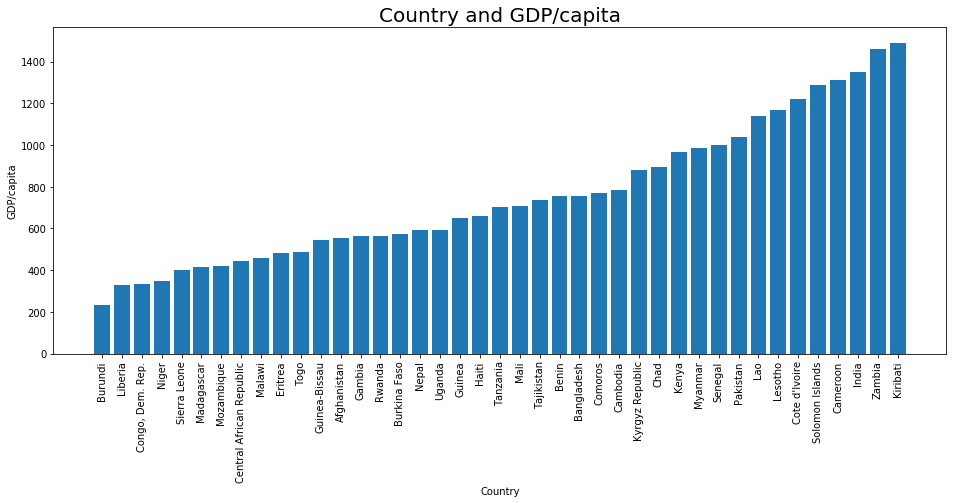

In [66]:
plt.figure(figsize=(16,6))
list_df = list_of_cities.sort_values('gdpp',ascending=True)
plt.bar(x=list_df.country,height=list_df.gdpp.sort_values(ascending=True),)
plt.title('Country and GDP/capita',fontsize=20)
plt.xlabel("Country")
plt.ylabel("GDP/capita")
plt.xticks(rotation=90)
plt.show()

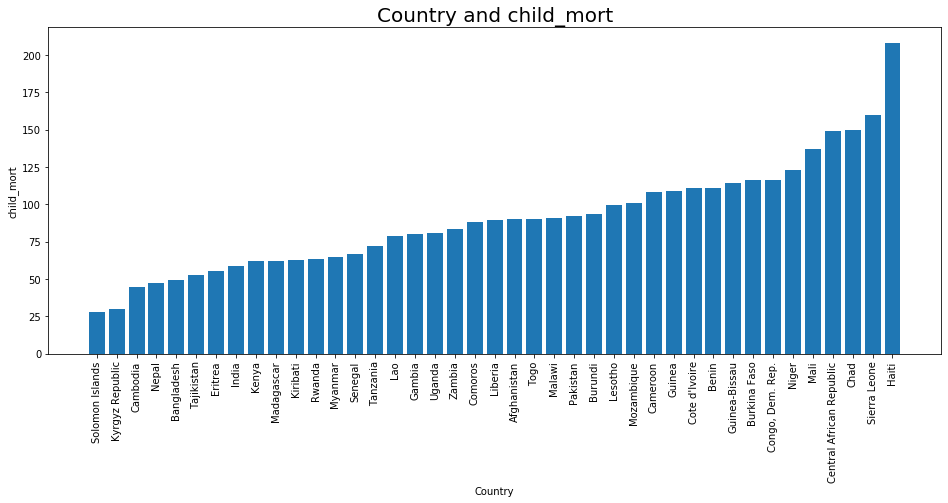

In [67]:
plt.figure(figsize=(16,6))
list_df = list_of_cities.sort_values('child_mort',ascending=True)
plt.bar(x=list_df.country,height=list_df.child_mort.sort_values(ascending=True),)
plt.title('Country and child_mort',fontsize=20)
plt.xlabel("Country")
plt.ylabel("child_mort")
plt.xticks(rotation=90)
plt.show()

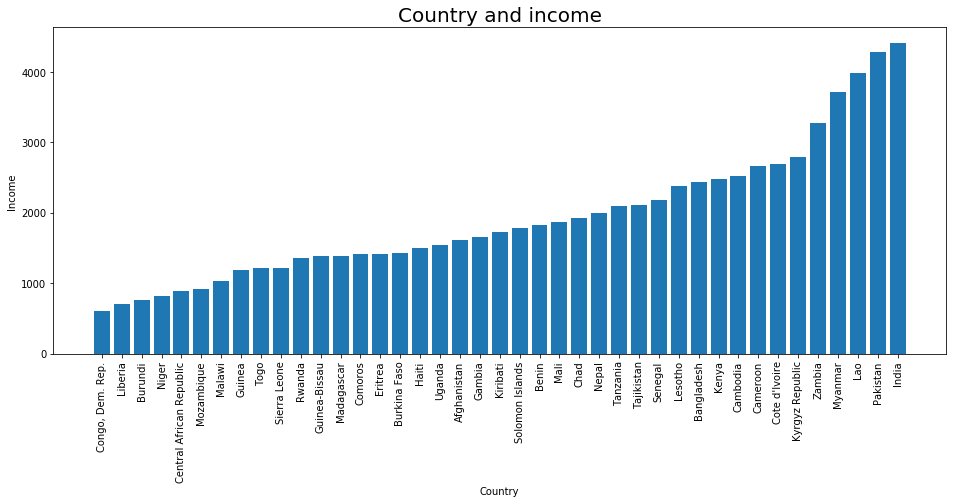

In [68]:
plt.figure(figsize=(16,6))
list_df = list_of_cities.sort_values('income',ascending=True)
plt.bar(x=list_df.country,height=list_df.income.sort_values(ascending=True),)
plt.title('Country and income',fontsize=20)
plt.xlabel("Country")
plt.ylabel("Income")
plt.xticks(rotation=90)
plt.show()

I think increasing the gdpp will be of top priority for an NGO.

 Countries which are in direst need of aid based on the gdpp from the analysis work are given below:
        - Burundi
        - Liberia
        - Congo, Dem. Rep.
        - Niger
        - Sierra Leone
        - Madagascar
        - Mozambique
        - Central African Republic
        - Malawi
        - Eritrea

# Thank You